#**Parte1. Configuración Drive e Instalación pySpark**
1. Vamos a generar un nuevo notebook.
2. Conectar con Google Drive
2. Instalar el módulo PySpark.
3. Crear la sesión Spark.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [5]:
!wget -q http://apache.mirrors.pair.com/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

In [6]:
!tar xf spark-3.5.0-bin-hadoop3.tgz

In [7]:
!pip install -q findspark

In [8]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

In [9]:
import findspark
findspark.init()

In [10]:
findspark.find()

'/content/spark-3.5.0-bin-hadoop3'

In [11]:
from pyspark import SparkContext

In [12]:
sc = SparkContext(master="local[*]", appName="PROYECTO_FINAL_BIG_DATA")
sc.setLogLevel("ERROR")

In [13]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("PROYECTO_FINAL_BIG_DATA")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

#**Parte 2. Analisis de datos.**

#  1. Cargar los datos en un DataFrame

In [14]:
from pyspark.sql.functions import col
df_airport = spark.read.options(inferSchema='True',delimiter=',', header=True).csv("/content/drive/MyDrive/TOKIO/Big Data - Cloud Computing/01 - Big Data/PROYECTO FINAL/Air_Traffic_Passenger_Statistics.csv")

In [15]:
df_airport.printSchema()

root
 |-- Activity Period: integer (nullable = true)
 |-- Operating Airline: string (nullable = true)
 |-- Operating Airline IATA Code: string (nullable = true)
 |-- Published Airline: string (nullable = true)
 |-- Published Airline IATA Code: string (nullable = true)
 |-- GEO Summary: string (nullable = true)
 |-- GEO Region: string (nullable = true)
 |-- Activity Type Code: string (nullable = true)
 |-- Price Category Code: string (nullable = true)
 |-- Terminal: string (nullable = true)
 |-- Boarding Area: string (nullable = true)
 |-- Passenger Count: integer (nullable = true)
 |-- Adjusted Activity Type Code: string (nullable = true)
 |-- Adjusted Passenger Count: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)



Renombraremos las columnas para evitar espacios en blanco y futuros problemas

In [16]:
df_airport = df_airport.withColumnRenamed("Activity Period", "ActivityPeriod") \
.withColumnRenamed("Activity Period", "ActivityPeriod") \
.withColumnRenamed("Operating Airline", "OperatingAirline") \
.withColumnRenamed("Operating Airline IATA Code", "OperatingAirlineIATACode") \
.withColumnRenamed("Published Airline", "PublishedAirline") \
.withColumnRenamed("Published Airline IATA Code", "PublishedAirlineIATACode") \
.withColumnRenamed("GEO Summary", "GEOSummary") \
.withColumnRenamed("GEO Region", "GEORegion") \
.withColumnRenamed("Activity Type Code", "ActivityTypeCode") \
.withColumnRenamed("Price Category Code", "PriceCategoryCode") \
.withColumnRenamed("Boarding Area", "BoardingArea") \
.withColumnRenamed("Passenger Count", "PassengerCount") \
.withColumnRenamed("Adjusted Activity Type Code", "AdjustedActivityTypeCode") \
.withColumnRenamed("Adjusted Passenger Count", "AdjustedPassengerCount")
df_airport.show(10)
df_airport.printSchema()

+--------------+----------------+------------------------+----------------+------------------------+-------------+-------------------+----------------+-----------------+-------------+------------+--------------+------------------------+----------------------+----+-----+
|ActivityPeriod|OperatingAirline|OperatingAirlineIATACode|PublishedAirline|PublishedAirlineIATACode|   GEOSummary|          GEORegion|ActivityTypeCode|PriceCategoryCode|     Terminal|BoardingArea|PassengerCount|AdjustedActivityTypeCode|AdjustedPassengerCount|Year|Month|
+--------------+----------------+------------------------+----------------+------------------------+-------------+-------------------+----------------+-----------------+-------------+------------+--------------+------------------------+----------------------+----+-----+
|        200507|    ATA Airlines|                      TZ|    ATA Airlines|                      TZ|     Domestic|                 US|        Deplaned|         Low Fare|   Terminal 1|    

#  2. Consultar datos del DataFrame

**¿Cuántas compañías diferentes aparecen en el fichero?**

In [17]:
df_airport.dropDuplicates(["OperatingAirline"]).select("OperatingAirline").count()

77

Creamos un nuevo dataFrame para exportar el resultado

In [25]:
df_airport_companies = df_airport.dropDuplicates(["OperatingAirline"]).select("OperatingAirline")
df_airport_companies.show()

+--------------------+
|    OperatingAirline|
+--------------------+
|          Icelandair|
|         Ameriflight|
|      Cathay Pacific|
|          Aeromexico|
|      Etihad Airways|
| Philippine Airlines|
|United Airlines -...|
|    Turkish Airlines|
| Swiss International|
|    Independence Air|
|Miami Air Interna...|
|          Air France|
|      Japan Airlines|
|    Midwest Airlines|
|      Atlas Air, Inc|
|    JetBlue Airways |
|       China Eastern|
|   Mexicana Airlines|
|         Air Canada |
|       Allegiant Air|
+--------------------+
only showing top 20 rows



In [ ]:
df_airport_companies.write.options(header="True").csv("/content/drive/MyDrive/TOKIO/Big Data - Cloud Computing/01 - Big Data/PROYECTO FINAL/Entrega/Ficheros/airport_companies")

AnalysisException: ignored

**¿Cuántos pasajeros tienen de media los vuelos de cada compañía?**

Creamos un nuevo dataFrame para exportar el resultado

In [26]:
df_avg_flights_per_company = df_airport.groupBy("OperatingAirline").mean("PassengerCount","AdjustedPassengerCount")
df_avg_flights_per_company.show()

+--------------------+-------------------+---------------------------+
|    OperatingAirline|avg(PassengerCount)|avg(AdjustedPassengerCount)|
+--------------------+-------------------+---------------------------+
|          Icelandair|             2799.7|                     2799.7|
|         Ameriflight|                5.0|          5.363636363636363|
|      Cathay Pacific| 17121.325581395347|         17121.325581395347|
|          Aeromexico|  5463.822222222222|          5463.822222222222|
|      Etihad Airways|  6476.088235294118|          6476.088235294118|
| Philippine Airlines| 10248.635658914729|         10248.635658914729|
|United Airlines -...|  48915.46750232126|          49365.51671309192|
|    Turkish Airlines|  8162.416666666667|          8162.416666666667|
| Swiss International|  6061.640287769784|          6061.640287769784|
|    Independence Air|             6391.3|                     6391.3|
|Miami Air Interna...|            107.375|                    107.375|
|     

In [ ]:
df_avg_flights_per_company.write.options(header="True").csv("/content/drive/MyDrive/TOKIO/Big Data - Cloud Computing/01 - Big Data/PROYECTO FINAL/Entrega/Ficheros/avg_flight_per_company")

AnalysisException: ignored

**Eliminación de registros duplicados por el campo GEO Region.** \

Eliminaremos los registros duplicados por el campo “GEO Región”, manteniendo
únicamente aquel con mayor número de pasajeros.

Creamos una vista para poder conusltar mediante SQL el DataFrame.

In [ ]:
df_airport.createTempView("df_airport_view")

Meidante una consulta SQL seleccionamos todos los registros agrupados por GEORegion recuperando solo aquellos con mayor PassengerCount eliminando asi los duplicados por GEORegion

In [ ]:
df_GEORegion_no_duplicates = spark.sql("select a1.* FROM " \
"df_airport_view a1, " \
"(SELECT GEORegion, MAX(PassengerCount) PassengerCount FROM df_airport_view GROUP BY GEORegion) a2 "\
"WHERE a1.GEORegion = a2.GEORegion " \
"AND a1.PassengerCount = a2.PassengerCount")
df_GEORegion_no_duplicates.show();

+--------------+--------------------+------------------------+--------------------+------------------------+-------------+-------------------+----------------+-----------------+-------------+------------+--------------+------------------------+----------------------+----+-------+
|ActivityPeriod|    OperatingAirline|OperatingAirlineIATACode|    PublishedAirline|PublishedAirlineIATACode|   GEOSummary|          GEORegion|ActivityTypeCode|PriceCategoryCode|     Terminal|BoardingArea|PassengerCount|AdjustedActivityTypeCode|AdjustedPassengerCount|Year|  Month|
+--------------+--------------------+------------------------+--------------------+------------------------+-------------+-------------------+----------------+-----------------+-------------+------------+--------------+------------------------+----------------------+----+-------+
|        200708|         Air Canada |                      AC|         Air Canada |                      AC|International|             Canada|        Deplane

Podemos hacer esto con la propia API de pyspark

In [ ]:
from pyspark.sql.functions import max

# Seleccionar el registro con mayor número de pasajeros para cada GEORegion
max_passengers_df = df_airport.groupBy("GEORegion").agg(max("PassengerCount").alias("PassengerCount"))

# Unir la tabla original con la tabla de máximos de pasajeros para obtener todos los campos del registro
result_df = df_airport.join(max_passengers_df, ["GEORegion", "PassengerCount"], "inner")

# Mostrar el resultado
result_df.show()

+-------------------+--------------+--------------+--------------------+------------------------+--------------------+------------------------+-------------+----------------+-----------------+-------------+------------+------------------------+----------------------+----+-------+
|          GEORegion|PassengerCount|ActivityPeriod|    OperatingAirline|OperatingAirlineIATACode|    PublishedAirline|PublishedAirlineIATACode|   GEOSummary|ActivityTypeCode|PriceCategoryCode|     Terminal|BoardingArea|AdjustedActivityTypeCode|AdjustedPassengerCount|Year|  Month|
+-------------------+--------------+--------------+--------------------+------------------------+--------------------+------------------------+-------------+----------------+-----------------+-------------+------------+------------------------+----------------------+----+-------+
|             Canada|         39798|        200708|         Air Canada |                      AC|         Air Canada |                      AC|International|

In [ ]:
df_GEORegion_no_duplicates.write.options(header="True").csv("/content/drive/MyDrive/TOKIO/Big Data - Cloud Computing/01 - Big Data/PROYECTO FINAL/Entrega/Ficheros/airtraffic_drop_duplicates_georegion")

#  3. Análisis estadístico

##**3.1. Análisis descriptivo**

In [ ]:
df_airport.describe().show()

+-------+------------------+----------------+------------------------+----------------+------------------------+-------------+---------+----------------+-----------------+-------------+------------+------------------+------------------------+----------------------+-----------------+---------+
|summary|    ActivityPeriod|OperatingAirline|OperatingAirlineIATACode|PublishedAirline|PublishedAirlineIATACode|   GEOSummary|GEORegion|ActivityTypeCode|PriceCategoryCode|     Terminal|BoardingArea|    PassengerCount|AdjustedActivityTypeCode|AdjustedPassengerCount|             Year|    Month|
+-------+------------------+----------------+------------------------+----------------+------------------------+-------------+---------+----------------+-----------------+-------------+------------+------------------+------------------------+----------------------+-----------------+---------+
|  count|             15007|           15007|                   14953|           15007|                   14953|      

In [ ]:
df_airport_pandas = df_airport.toPandas()

In [ ]:
df_airport_pandas.mode(axis=0)

,ActivityPeriod,OperatingAirline,OperatingAirlineIATACode,PublishedAirline,PublishedAirlineIATACode,GEOSummary,GEORegion,ActivityTypeCode,PriceCategoryCode,Terminal,BoardingArea,PassengerCount,AdjustedActivityTypeCode,AdjustedPassengerCount,Year,Month
0,200807,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,US,Deplaned,Other,International,A,2,Deplaned,2,2015,August


**ACTIVITY PERIOD**

In [ ]:
df_airport_pandas['ActivityPeriod'].mode()

0    200807
dtype: int32

In [ ]:
df_airport.dropDuplicates(["ActivityPeriod" ,"Year","Month"]).select("ActivityPeriod" ,"Year","Month").sort("ActivityPeriod").show(500)

+--------------+----+---------+
|ActivityPeriod|Year|    Month|
+--------------+----+---------+
|        200507|2005|     July|
|        200508|2005|   August|
|        200509|2005|September|
|        200510|2005|  October|
|        200511|2005| November|
|        200512|2005| December|
|        200601|2006|  January|
|        200602|2006| February|
|        200603|2006|    March|
|        200604|2006|    April|
|        200605|2006|      May|
|        200606|2006|     June|
|        200607|2006|     July|
|        200608|2006|   August|
|        200609|2006|September|
|        200610|2006|  October|
|        200611|2006| November|
|        200612|2006| December|
|        200701|2007|  January|
|        200702|2007| February|
|        200703|2007|    March|
|        200704|2007|    April|
|        200705|2007|      May|
|        200706|2007|     June|
|        200707|2007|     July|
|        200708|2007|   August|
|        200709|2007|September|
|        200710|2007|  October|
|       

**OPERATING AIRLINE**

In [ ]:
df_airport_pandas['OperatingAirline'].mode()

0    United Airlines - Pre 07/01/2013
dtype: object

In [ ]:
df_airport.filter(df_airport.OperatingAirline == "United Airlines - Pre 07/01/2013").dropDuplicates().count()

2154

**OPERATING AIRLINE IATA CODE**

In [ ]:
df_airport_pandas['OperatingAirlineIATACode'].mode()

0    UA
dtype: object

**PUBLISHED AIRLINE**

In [ ]:
df_airport_pandas['PublishedAirline'].mode()

0    United Airlines - Pre 07/01/2013
dtype: object

**PUBLISHED AIRLINE IATA CODE**

In [ ]:
df_airport_pandas['PublishedAirlineIATACode'].mode()

0    UA
dtype: object

**GEO SUMMARY**

In [ ]:
df_airport_pandas['GEOSummary'].mode()

0    International
dtype: object

In [ ]:
df_airport.select("GEOSummary").dropDuplicates().show()

+-------------+
|   GEOSummary|
+-------------+
|International|
|     Domestic|
+-------------+



**GEO REGION**

In [ ]:
df_airport_pandas['GEORegion'].mode()

0    US
dtype: object

In [ ]:
df_airport.select("GEORegion").dropDuplicates().show()

+-------------------+
|          GEORegion|
+-------------------+
|             Europe|
|    Central America|
|                 US|
|      South America|
|             Mexico|
|        Middle East|
|             Canada|
|Australia / Oceania|
|               Asia|
+-------------------+



**ACTIVITY TYPE CODE**

In [ ]:
df_airport_pandas['ActivityTypeCode'].mode()

0    Deplaned
dtype: object

In [ ]:
df_airport.select("ActivityTypeCode").dropDuplicates().show()

+----------------+
|ActivityTypeCode|
+----------------+
|        Enplaned|
|  Thru / Transit|
|        Deplaned|
+----------------+



**PRICE CATEGORY CODE**

In [ ]:
df_airport_pandas['PriceCategoryCode'].mode()

0    Other
dtype: object

In [ ]:
df_airport.select("PriceCategoryCode").dropDuplicates().show()

+-----------------+
|PriceCategoryCode|
+-----------------+
|            Other|
|         Low Fare|
+-----------------+



**TERMINAL**

In [ ]:
df_airport_pandas['Terminal'].mode()

0    International
dtype: object

In [ ]:
df_airport.select("Terminal").dropDuplicates().show()

+-------------+
|     Terminal|
+-------------+
|International|
|        Other|
|   Terminal 3|
|   Terminal 2|
|   Terminal 1|
+-------------+



**BOARDING AREA**

In [ ]:
df_airport_pandas['BoardingArea'].mode()

0    A
dtype: object

In [ ]:
df_airport.select("BoardingArea").dropDuplicates().show()

+------------+
|BoardingArea|
+------------+
|           F|
|           E|
|           B|
|           D|
|       Other|
|           C|
|           A|
|           G|
+------------+



**PASSENGER COUNT**

In [ ]:
df_airport.describe("PassengerCount").show()

+-------+------------------+
|summary|    PassengerCount|
+-------+------------------+
|  count|             15007|
|   mean|29240.521090157927|
| stddev|58319.509284123524|
|    min|                 1|
|    max|            659837|
+-------+------------------+



In [ ]:
df_airport_pandas['PassengerCount'].mode()

0    2
dtype: int32

**ADJUSTED ACTIVITY TYPE CODE**

In [ ]:
df_airport_pandas['AdjustedActivityTypeCode'].mode()

0    Deplaned
dtype: object

**ADJUSTED PASSENGER COUNT**

In [ ]:
df_airport.describe("AdjustedPassengerCount").show()

+-------+----------------------+
|summary|AdjustedPassengerCount|
+-------+----------------------+
|  count|                 15007|
|   mean|    29331.917105350836|
| stddev|      58284.1822186625|
|    min|                     1|
|    max|                659837|
+-------+----------------------+



In [ ]:
df_airport_pandas['AdjustedPassengerCount'].mode()

0    2
dtype: int32

**YEAR**

In [ ]:
df_airport.describe("Year").show()

+-------+-----------------+
|summary|             Year|
+-------+-----------------+
|  count|            15007|
|   mean|2010.385220230559|
| stddev|3.137589043169972|
|    min|             2005|
|    max|             2016|
+-------+-----------------+



In [ ]:
df_airport_pandas['Year'].mode()

0    2015
dtype: int32

**MONTH**

In [ ]:
df_airport_pandas['Month'].mode()

0    August
dtype: object

##**3.2. Análisis de correlación**

Creremos una matriz de correlación con todas las columnas del DataFrame.\
Para ello primero convertiremos el dataFrame a uno de Pandas y pasaremos las columnas categóricas a tipo numérico con cat.codes.\
Posteriormente sacaremos la matriz con la función corr() del DataFrame.

In [ ]:
import pandas as pd
df_airport_pd = df_airport.toPandas();
df_airport_pd

,ActivityPeriod,OperatingAirline,OperatingAirlineIATACode,PublishedAirline,PublishedAirlineIATACode,GEOSummary,GEORegion,ActivityTypeCode,PriceCategoryCode,Terminal,BoardingArea,PassengerCount,AdjustedActivityTypeCode,AdjustedPassengerCount,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


Pasamos las columnas categoricas a numéricas. \
No es necesario cambiar el tipo de las columnas numéricas porque todas son de tipo int, si no fuese así, seria conveniente modificarlas todas a un mismo tipo, por ejemplo, double.

In [ ]:
#df_airport_pd['ActivityPeriod']=df_airport_pd['ActivityPeriod'].astype('category').cat.codes
df_airport_pd['OperatingAirline']=df_airport_pd['OperatingAirline'].astype('category').cat.codes
df_airport_pd['OperatingAirlineIATACode']=df_airport_pd['OperatingAirlineIATACode'].astype('category').cat.codes
df_airport_pd['PublishedAirline']=df_airport_pd['PublishedAirline'].astype('category').cat.codes
df_airport_pd['PublishedAirlineIATACode']=df_airport_pd['PublishedAirlineIATACode'].astype('category').cat.codes
df_airport_pd['GEOSummary']=df_airport_pd['GEOSummary'].astype('category').cat.codes
df_airport_pd['GEORegion']=df_airport_pd['GEORegion'].astype('category').cat.codes
df_airport_pd['ActivityTypeCode']=df_airport_pd['ActivityTypeCode'].astype('category').cat.codes
df_airport_pd['PriceCategoryCode']=df_airport_pd['PriceCategoryCode'].astype('category').cat.codes
df_airport_pd['Terminal']=df_airport_pd['Terminal'].astype('category').cat.codes
df_airport_pd['BoardingArea']=df_airport_pd['BoardingArea'].astype('category').cat.codes
df_airport_pd['AdjustedActivityTypeCode']=df_airport_pd['AdjustedActivityTypeCode'].astype('category').cat.codes
df_airport_pd['Month']=df_airport_pd['Month'].astype('category').cat.codes

df_airport_pd

,ActivityPeriod,OperatingAirline,OperatingAirlineIATACode,PublishedAirline,PublishedAirlineIATACode,GEOSummary,GEORegion,ActivityTypeCode,PriceCategoryCode,Terminal,BoardingArea,PassengerCount,AdjustedActivityTypeCode,AdjustedPassengerCount,Year,Month
0,200507,0,60,0,54,0,8,0,0,2,1,27271,0,27271,2005,5
1,200507,0,60,0,54,0,8,1,0,2,1,29131,1,29131,2005,5
2,200507,0,60,0,54,0,8,2,0,2,1,5415,2,10830,2005,5
3,200507,4,6,4,6,1,2,0,1,2,1,35156,0,35156,2005,5
4,200507,4,6,4,6,1,2,1,1,2,1,34090,1,34090,2005,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,71,64,62,58,0,8,1,0,3,3,194636,1,194636,2016,7
15003,201603,71,64,62,58,1,5,0,0,0,0,4189,0,4189,2016,7
15004,201603,71,64,62,58,1,5,1,0,3,3,4693,1,4693,2016,7
15005,201603,72,63,63,57,1,4,0,1,0,0,12313,0,12313,2016,7


Adicionalemnte, añadimos 2 nuevas columnas Date y DateOrd \
**Date**: columna de tipo Date que combina Year y Month (no aparecerá en la matriz de correlación final)\
**DateOrd**: Numero ordinal asociado a la columna Date (si aparecerá en la matriz de correlación)

In [ ]:
df_airport_pd['Date'] = df_airport_pd[df_airport_pd.columns[14:15]].apply(lambda x: "-".join(x.values.astype(str)),axis="columns")
df_airport_pd['Date']= pd.to_datetime(df_airport_pd['Date']).dt.strftime("%Y-%m") #esto hace la columna un string

In [ ]:
import datetime as dt
df_airport_pd['Date']= pd.to_datetime(df_airport_pd['Date'])
df_airport_pd['DateOrd']=df_airport_pd['Date'].map(dt.datetime.toordinal)
df_airport_pd = df_airport_pd.sort_values(by=["DateOrd"])
df_airport_pd

,ActivityPeriod,OperatingAirline,OperatingAirlineIATACode,PublishedAirline,PublishedAirlineIATACode,GEOSummary,GEORegion,ActivityTypeCode,PriceCategoryCode,Terminal,BoardingArea,PassengerCount,AdjustedActivityTypeCode,AdjustedPassengerCount,Year,Month,Date,DateOrd
0,200507,0,60,0,54,0,8,0,0,2,1,27271,0,27271,2005,5,2005-01-01,731947
459,200510,70,61,61,55,1,2,2,1,4,5,40,2,80,2005,10,2005-01-01,731947
460,200510,70,61,61,55,1,4,0,1,0,6,27617,0,27617,2005,10,2005-01-01,731947
461,200510,70,61,61,55,1,4,1,1,0,6,26955,1,26955,2005,10,2005-01-01,731947
462,200510,70,61,61,55,1,4,2,1,0,6,862,2,1724,2005,10,2005-01-01,731947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14754,201601,71,64,62,58,0,8,0,0,3,3,164496,0,164496,2016,4,2016-01-01,735964
14753,201601,69,61,60,55,1,5,1,1,4,5,8632,1,8632,2016,4,2016-01-01,735964
14752,201601,69,61,60,55,1,5,1,1,4,4,165,1,165,2016,4,2016-01-01,735964
14761,201602,1,23,1,22,1,4,1,1,0,6,2737,1,2737,2016,3,2016-01-01,735964


Obtenemos la matriz de correlación de todas las variables

In [ ]:
correlation_matrix = df_airport_pd.corr()
correlation_matrix

,ActivityPeriod,OperatingAirline,OperatingAirlineIATACode,PublishedAirline,PublishedAirlineIATACode,GEOSummary,GEORegion,ActivityTypeCode,PriceCategoryCode,Terminal,BoardingArea,PassengerCount,AdjustedActivityTypeCode,AdjustedPassengerCount,Year,Month,DateOrd
ActivityPeriod,1.000000,0.008180,-0.043338,0.009663,-0.010853,0.066100,-0.028145,-0.052450,-0.005754,-0.088284,-0.005123,0.060311,-0.052450,0.059336,0.999940,-0.027142,0.999940
OperatingAirline,0.008180,1.000000,0.823688,0.968828,0.818090,-0.130956,0.151120,0.100644,-0.096112,0.197959,0.251975,0.185424,0.100644,0.186427,0.008183,-0.000452,0.008180
OperatingAirlineIATACode,-0.043338,0.823688,1.000000,0.790621,0.919021,-0.131919,0.101535,0.099556,-0.091939,0.208314,0.280294,0.122244,0.099556,0.123170,-0.043257,0.000861,-0.043258
PublishedAirline,0.009663,0.968828,0.790621,1.000000,0.859995,-0.083020,0.108379,0.098414,-0.095284,0.199894,0.275990,0.200862,0.098414,0.201890,0.009641,0.000609,0.009638
PublishedAirlineIATACode,-0.010853,0.818090,0.919021,0.859995,1.000000,-0.027591,0.008986,0.097818,-0.105385,0.167910,0.312936,0.155368,0.097818,0.156337,-0.010837,0.001689,-0.010837
GEOSummary,0.066100,-0.130956,-0.131919,-0.083020,-0.027591,1.000000,-0.871826,-0.026760,0.411498,-0.574422,0.109553,-0.395743,-0.026760,-0.396856,0.066046,-0.001139,0.066048
GEORegion,-0.028145,0.151120,0.101535,0.108379,0.008986,-0.871826,1.000000,0.033899,-0.382864,0.509119,-0.121033,0.336113,0.033899,0.336980,-0.028129,0.000949,-0.028130
ActivityTypeCode,-0.052450,0.100644,0.099556,0.098414,0.097818,-0.026760,0.033899,1.000000,0.001004,0.087788,0.087706,-0.071423,1.000000,-0.067804,-0.052364,-0.001523,-0.052368
PriceCategoryCode,-0.005754,-0.096112,-0.091939,-0.095284,-0.105385,0.411498,-0.382864,0.001004,1.000000,-0.102936,0.213485,-0.065047,0.001004,-0.064661,-0.005683,-0.003627,-0.005681
Terminal,-0.088284,0.197959,0.208314,0.199894,0.167910,-0.574422,0.509119,0.087788,-0.102936,1.000000,0.168414,0.429146,0.087788,0.430687,-0.088155,-0.000093,-0.088161


Añadimos un estilo para una mejor visualización

In [ ]:
correlation_matrix.style.background_gradient(cmap='coolwarm')


,ActivityPeriod,OperatingAirline,OperatingAirlineIATACode,PublishedAirline,PublishedAirlineIATACode,GEOSummary,GEORegion,ActivityTypeCode,PriceCategoryCode,Terminal,BoardingArea,PassengerCount,AdjustedActivityTypeCode,AdjustedPassengerCount,Year,Month,DateOrd
ActivityPeriod,1.000000,0.008180,-0.043338,0.009663,-0.010853,0.066100,-0.028145,-0.052450,-0.005754,-0.088284,-0.005123,0.060311,-0.052450,0.059336,0.999940,-0.027142,0.999940
OperatingAirline,0.008180,1.000000,0.823688,0.968828,0.818090,-0.130956,0.151120,0.100644,-0.096112,0.197959,0.251975,0.185424,0.100644,0.186427,0.008183,-0.000452,0.008180
OperatingAirlineIATACode,-0.043338,0.823688,1.000000,0.790621,0.919021,-0.131919,0.101535,0.099556,-0.091939,0.208314,0.280294,0.122244,0.099556,0.123170,-0.043257,0.000861,-0.043258
PublishedAirline,0.009663,0.968828,0.790621,1.000000,0.859995,-0.083020,0.108379,0.098414,-0.095284,0.199894,0.275990,0.200862,0.098414,0.201890,0.009641,0.000609,0.009638
PublishedAirlineIATACode,-0.010853,0.818090,0.919021,0.859995,1.000000,-0.027591,0.008986,0.097818,-0.105385,0.167910,0.312936,0.155368,0.097818,0.156337,-0.010837,0.001689,-0.010837
GEOSummary,0.066100,-0.130956,-0.131919,-0.083020,-0.027591,1.000000,-0.871826,-0.026760,0.411498,-0.574422,0.109553,-0.395743,-0.026760,-0.396856,0.066046,-0.001139,0.066048
GEORegion,-0.028145,0.151120,0.101535,0.108379,0.008986,-0.871826,1.000000,0.033899,-0.382864,0.509119,-0.121033,0.336113,0.033899,0.336980,-0.028129,0.000949,-0.028130
ActivityTypeCode,-0.052450,0.100644,0.099556,0.098414,0.097818,-0.026760,0.033899,1.000000,0.001004,0.087788,0.087706,-0.071423,1.000000,-0.067804,-0.052364,-0.001523,-0.052368
PriceCategoryCode,-0.005754,-0.096112,-0.091939,-0.095284,-0.105385,0.411498,-0.382864,0.001004,1.000000,-0.102936,0.213485,-0.065047,0.001004,-0.064661,-0.005683,-0.003627,-0.005681
Terminal,-0.088284,0.197959,0.208314,0.199894,0.167910,-0.574422,0.509119,0.087788,-0.102936,1.000000,0.168414,0.429146,0.087788,0.430687,-0.088155,-0.000093,-0.088161


GEOSUmmary - PriceCategoryCode

In [ ]:
df_airport_pd.GEOSummary.corr(df_airport_pd.PriceCategoryCode)

0.4114984805645139

GEO Summary – GEO Region

In [ ]:
df_airport_pd.GEOSummary.corr(df_airport_pd.GEORegion)

-0.8718261857198392

GEO Region - Terminal

In [ ]:
df_airport_pd.GEORegion.corr(df_airport_pd.Terminal)

0.5091186306605866

GEO Region - Price Category Code

In [ ]:
df_airport_pd.PriceCategoryCode.corr(df_airport_pd.GEORegion)

-0.3828639102138205

Adjusted Passenger Count – GEO Region

In [ ]:
df_airport_pd.AdjustedPassengerCount.corr(df_airport_pd.GEORegion)

0.3369804846146507

Adjusted Passenger Count – Terminal

In [ ]:
df_airport_pd.AdjustedPassengerCount.corr(df_airport_pd.Terminal)

0.4306870756252966

###Point-biserial

Utilizaremos **point biserial** para estudiar la correlacion entre el numero de pasajeros y las variables categoricas dicotomicas de nuestro dataframe (GEOSummary(Domestic, International) y PriceCategoryCode (Low-fare , Other)). \
Utilizamos **Point Biserial** porque es el mas adecuado para medir la correlación entre una varaible categorica dicotomica (2 valores distintos como máximo) y una variable numérica

In [ ]:
from scipy import stats

In [ ]:
stats.pointbiserialr(df_airport_pd['GEOSummary'], df_airport_pd['AdjustedPassengerCount'])

PointbiserialrResult(correlation=-0.39685620097984975, pvalue=0.0)

In [ ]:
stats.pointbiserialr(df_airport_pd['PriceCategoryCode'], df_airport_pd['AdjustedPassengerCount'])

PointbiserialrResult(correlation=-0.0646612429860395, pvalue=2.2120528625642906e-15)

Observamos que los resultados obtenidos son similares a los obtenidos en la matriz de correlación

##**3.3. Regresión lineal**

Realizaremos una regresión lineal para ver como evolucionará el numero de pasajeros que pasarán por nuestro aeropuerto en los próximos años

Importamos las librerias que usaremos

In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

A partir de los datos de nuestro DataFrame creamos uno nuevo que contenga una columna con el añó y otra con el sumatorio de los pasajeros que han pasado por nuesto aeropuerto(PassengerCount) durante ese año

In [ ]:
from pyspark.sql.functions import sum

df_pass_by_year = df_airport.groupBy("Year" , "Month").agg(sum("AdjustedPassengerCount").alias("AdjustedPassengerCountSum"))
df_pass_by_year.show()

+----+---------+-------------------------+
|Year|    Month|AdjustedPassengerCountSum|
+----+---------+-------------------------+
|2006|September|                  2738319|
|2007|      May|                  3080467|
|2012| February|                  3005764|
|2008|    April|                  3048005|
|2006|  October|                  2851945|
|2011| November|                  3334801|
|2006| February|                  2247255|
|2014|     July|                  4506218|
|2011|   August|                  3930681|
|2007| December|                  2917258|
|2013|   August|                  4351101|
|2009| February|                  2368782|
|2014|      May|                  4151403|
|2011|  October|                  3611694|
|2006|     July|                  3248908|
|2006| November|                  2671437|
|2014| November|                  3629119|
|2009|      May|                  3186209|
|2013| December|                  3819276|
|2014| December|                  3856908|
+----+-----

In [ ]:
df_pass_by_year_pd = df_pass_by_year.toPandas()

Transformamos la columna month a entero (Ej: 01 en vez de Enero)

In [ ]:
import calendar as cal

lower_ma = [m.lower() for m in cal.month_name]
df_pass_by_year_pd['Month'] = df_pass_by_year_pd['Month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [ ]:
df_pass_by_year_pd.sort_values(by=['Year','Month'])

,Year,Month,AdjustedPassengerCountSum
60,2005,7,3254797
62,2005,8,3224118
90,2005,9,2764519
117,2005,10,2798480
84,2005,11,2638631
...,...,...,...
109,2015,11,4014388
82,2015,12,4129462
113,2016,1,3749417
85,2016,2,3543751


Generamos una nueva columna que una el year y el month

In [ ]:
df_pass_by_year_pd['Date'] = df_pass_by_year_pd[df_pass_by_year_pd.columns[0:2]].apply(lambda x: "-".join(x.values.astype(str)),axis="columns")
df_pass_by_year_pd['Date']= pd.to_datetime(df_pass_by_year_pd['Date']).dt.strftime("%Y-%m") #esto hace la columna un string
df_pass_by_year_pd = df_pass_by_year_pd.sort_values(by=["Date"])
df_pass_by_year_pd

,Year,Month,AdjustedPassengerCountSum,Date
60,2005,7,3254797,2005-07
62,2005,8,3224118,2005-08
90,2005,9,2764519,2005-09
117,2005,10,2798480,2005-10
84,2005,11,2638631,2005-11
...,...,...,...,...
109,2015,11,4014388,2015-11
82,2015,12,4129462,2015-12
113,2016,1,3749417,2016-01
85,2016,2,3543751,2016-02


In [ ]:
df_pass_by_year_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 60 to 31
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       129 non-null    int32 
 1   Month                      129 non-null    Int8  
 2   AdjustedPassengerCountSum  129 non-null    int64 
 3   Date                       129 non-null    object
dtypes: Int8(1), int32(1), int64(1), object(1)
memory usage: 3.8+ KB


Mostramos nuestros datos reales en un gráfico

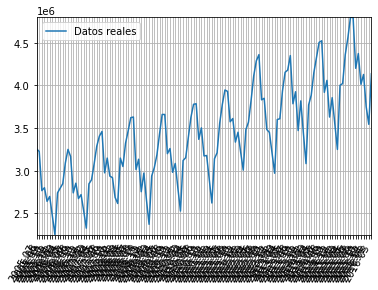

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_pass_by_year_pd['Date'] , df_pass_by_year_pd['AdjustedPassengerCountSum'], label="Datos reales")
plt.rcParams["figure.figsize"] = (60,10)
plt.grid(True)
plt.xticks(rotation=60,ha="right")
plt.margins(0)
plt.legend()

No podemos utilizar fechas para calcular una regresión por lo que debemos convertir el campo Date a numerico ordinal. \
En el paso anterior, hemos formateado la fecha para que tenga formato AAAA-MM dejando la columna como String. Convertimos de nuevo la columna a DateTime y despues a Ordinal.

In [ ]:
from sklearn import linear_model

In [ ]:
import datetime as dt
df_pass_by_year_pd['Date']= pd.to_datetime(df_pass_by_year_pd['Date'])
df_pass_by_year_pd['DateOrd']=df_pass_by_year_pd['Date'].map(dt.datetime.toordinal)
df_pass_by_year_pd = df_pass_by_year_pd.sort_values(by=["DateOrd"])
df_pass_by_year_pd

,Year,Month,AdjustedPassengerCountSum,Date,DateOrd
60,2005,7,3254797,2005-07-01,732128
62,2005,8,3224118,2005-08-01,732159
90,2005,9,2764519,2005-09-01,732190
117,2005,10,2798480,2005-10-01,732220
84,2005,11,2638631,2005-11-01,732251
...,...,...,...,...,...
109,2015,11,4014388,2015-11-01,735903
82,2015,12,4129462,2015-12-01,735933
113,2016,1,3749417,2016-01-01,735964
85,2016,2,3543751,2016-02-01,735995


Simplificamos el dataFrame quedandonos solo con los pasajeros, la fecha y el ordinal

In [ ]:
df_pass_by_year_pd_simple = df_pass_by_year_pd[["AdjustedPassengerCountSum" , "Date" , "DateOrd"]]
df_pass_by_year_pd_simple

,AdjustedPassengerCountSum,Date,DateOrd
60,3254797,2005-07-01,732128
62,3224118,2005-08-01,732159
90,2764519,2005-09-01,732190
117,2798480,2005-10-01,732220
84,2638631,2005-11-01,732251
...,...,...,...
109,4014388,2015-11-01,735903
82,4129462,2015-12-01,735933
113,3749417,2016-01-01,735964
85,3543751,2016-02-01,735995


In [ ]:
df_pass_by_year_pd_simple.corr().style.background_gradient(cmap='coolwarm')

,AdjustedPassengerCountSum,DateOrd
AdjustedPassengerCountSum,1.000000,0.767514
DateOrd,0.767514,1.000000


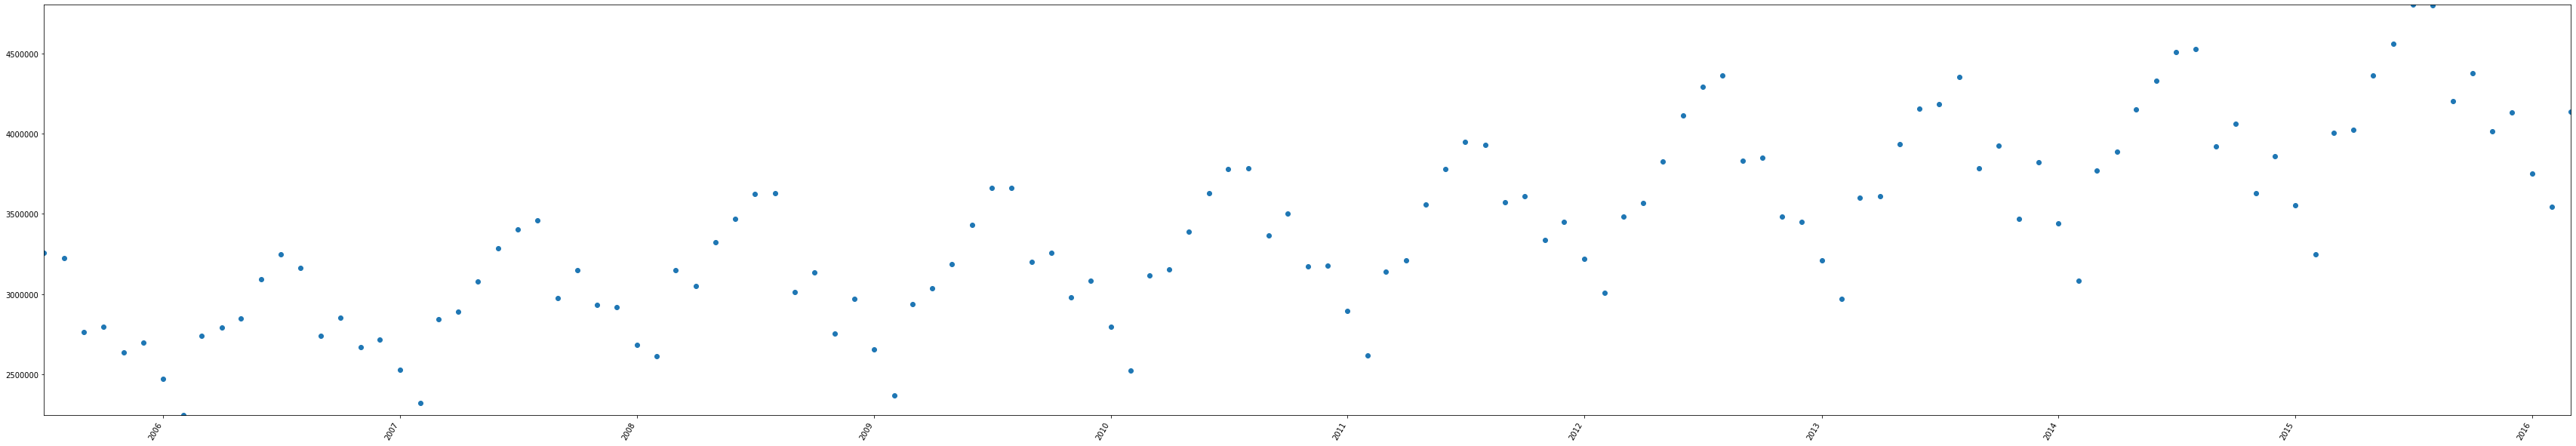

In [ ]:
plt.scatter(df_pass_by_year_pd_simple["Date"] , df_pass_by_year_pd_simple["AdjustedPassengerCountSum"])
plt.rcParams["figure.figsize"] = (30,10)
plt.xticks(rotation=60,ha="right")
plt.ticklabel_format(style='sci', axis='y', scilimits=(-1000000,1000000))
plt.margins(0)
plt.show()

Creamos la regresión

In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression()

In [ ]:
explicativas = df_pass_by_year_pd_simple[['DateOrd']] #independiente
objetivo = df_pass_by_year_pd_simple[['AdjustedPassengerCountSum']] #dependiente

In [ ]:
model.fit(explicativas , objetivo)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['DateOrd'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[379.44746584]]),
 '_residues': array([1.66438844e+13]),
 'rank_': 1,
 'singular_': array([12873.05356763]),
 'intercept_': array([-2.75131198e+08])}

PassengerCount = 279601791.287 + 385.52 * dateOrd

Creamos la predicción y, muy importante, ordenamos el dataset para despues visualizar la gráfica correctamente

In [ ]:
pred = model.predict(X=df_pass_by_year_pd_simple[['DateOrd']])

In [ ]:
pred[:10]

array([[2672916.00764376],
       [2684678.87908489],
       [2696441.75052595],
       [2707825.17450118],
       [2719588.04594231],
       [2730971.46991754],
       [2742734.3413586 ],
       [2754497.21279973],
       [2765121.74184328],
       [2776884.61328435]])

In [ ]:
df_pass_by_year_pd_simple.insert(3, 'Prediction' , pred)

In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)
df_pass_by_year_pd_simple = df_pass_by_year_pd_simple.sort_values(by=["DateOrd"])
df_pass_by_year_pd_simple

,AdjustedPassengerCountSum,Date,DateOrd,Prediction
60,3254797,2005-07-01,732128,2672916.008
62,3224118,2005-08-01,732159,2684678.879
90,2764519,2005-09-01,732190,2696441.751
117,2798480,2005-10-01,732220,2707825.175
84,2638631,2005-11-01,732251,2719588.046
...,...,...,...,...
109,4014388,2015-11-01,735903,4105330.191
82,4129462,2015-12-01,735933,4116713.615
113,3749417,2016-01-01,735964,4128476.487
85,3543751,2016-02-01,735995,4140239.358


In [ ]:
print(model.score(X=explicativas , y=objetivo))

0.5890770891022032


In [ ]:
df_pass_by_year_pd_simple = df_pass_by_year_pd_simple.sort_values(by=["Date"])
df_pass_by_year_pd_simple

,AdjustedPassengerCountSum,Date,DateOrd,Prediction
60,3254797,2005-07-01,732128,2672916.008
62,3224118,2005-08-01,732159,2684678.879
90,2764519,2005-09-01,732190,2696441.751
117,2798480,2005-10-01,732220,2707825.175
84,2638631,2005-11-01,732251,2719588.046
...,...,...,...,...
109,4014388,2015-11-01,735903,4105330.191
82,4129462,2015-12-01,735933,4116713.615
113,3749417,2016-01-01,735964,4128476.487
85,3543751,2016-02-01,735995,4140239.358


Volvemos a pasar la fecha a formato AAAA-MM

In [ ]:
df_pass_by_year_pd_simple['Date']= pd.to_datetime(df_pass_by_year_pd['Date']).dt.strftime("%Y-%m") #esto hace la columna un string

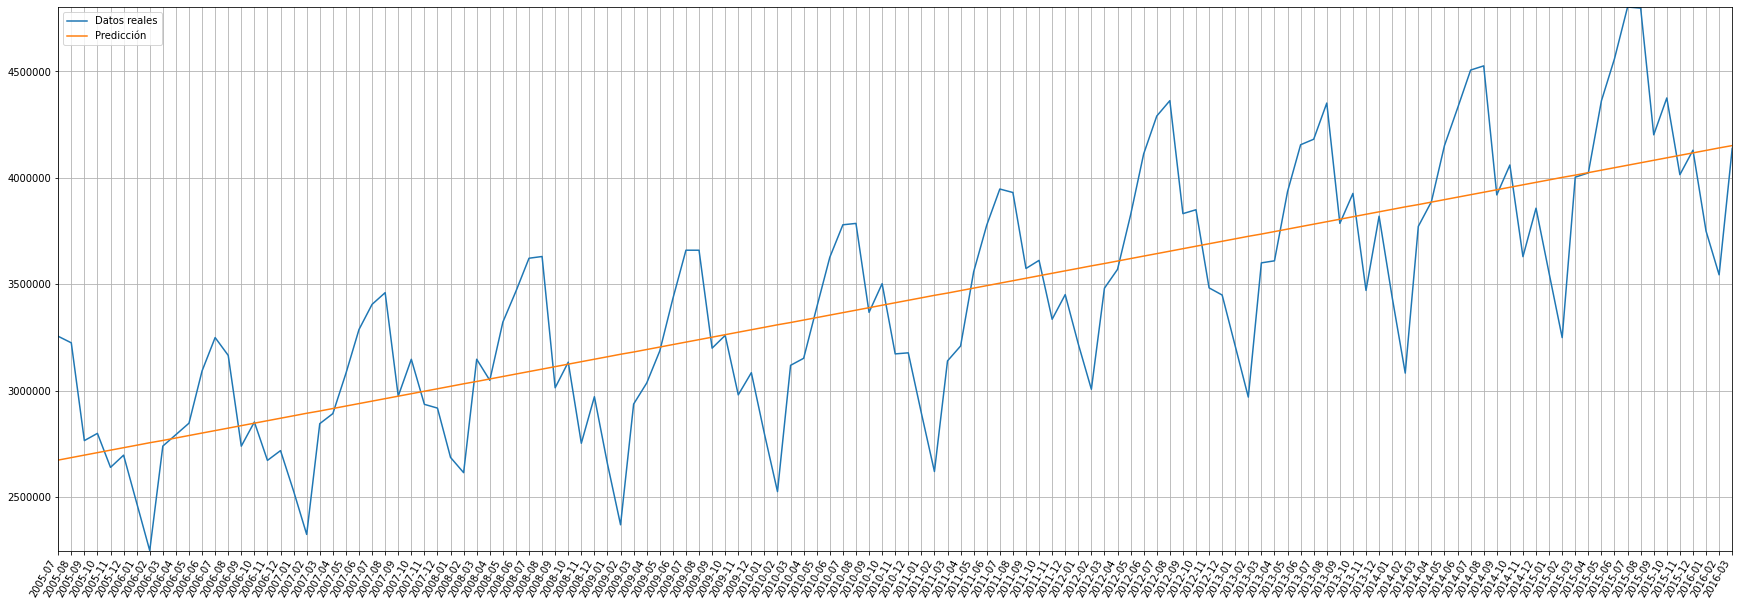

In [ ]:
plt.plot(df_pass_by_year_pd_simple['Date'] , df_pass_by_year_pd_simple['AdjustedPassengerCountSum'], label="Datos reales")
plt.plot(df_pass_by_year_pd_simple['Date'] , df_pass_by_year_pd_simple['Prediction'], label="Predicción")
plt.rcParams["figure.figsize"] = (30,10)
plt.grid(True)
plt.xticks(rotation=60,ha="right")
plt.ticklabel_format(style='sci', axis='y', scilimits=(-1000000,1000000))
plt.margins(0)
plt.legend()

Comprobamos predicciones a futuro generando un rango de fechas

In [ ]:
dates_list = pd.date_range('2016-01-01','2016-12-31',
              freq='MS')

Creamos un dataframe y añadimos el ordinal

In [ ]:
df_pred_future = pd.DataFrame(dates_list, columns=["Date"])

df_pred_future['DateOrd']=df_pred_future['Date'].map(dt.datetime.toordinal)
df_pred_future = df_pred_future.sort_values(by=["DateOrd"])
df_pred_future

,Date,DateOrd
0,2016-01-01,735964
1,2016-02-01,735995
2,2016-03-01,736024
3,2016-04-01,736055
4,2016-05-01,736085
5,2016-06-01,736116
6,2016-07-01,736146
7,2016-08-01,736177
8,2016-09-01,736208
9,2016-10-01,736238


Calculamos la predicción con el modelo creado anteriormente para las fechas futuras

In [ ]:
pred_future = model.predict(X=df_pred_future[['DateOrd']])
df_pred_future.insert(2, 'Prediction' , pred_future)

In [ ]:
df_pred_future

,Date,DateOrd,Prediction
0,2016-01-01,735964,4128476.487
1,2016-02-01,735995,4140239.358
2,2016-03-01,736024,4151243.335
3,2016-04-01,736055,4163006.206
4,2016-05-01,736085,4174389.630
5,2016-06-01,736116,4186152.501
6,2016-07-01,736146,4197535.925
7,2016-08-01,736177,4209298.797
8,2016-09-01,736208,4221061.668
9,2016-10-01,736238,4232445.092


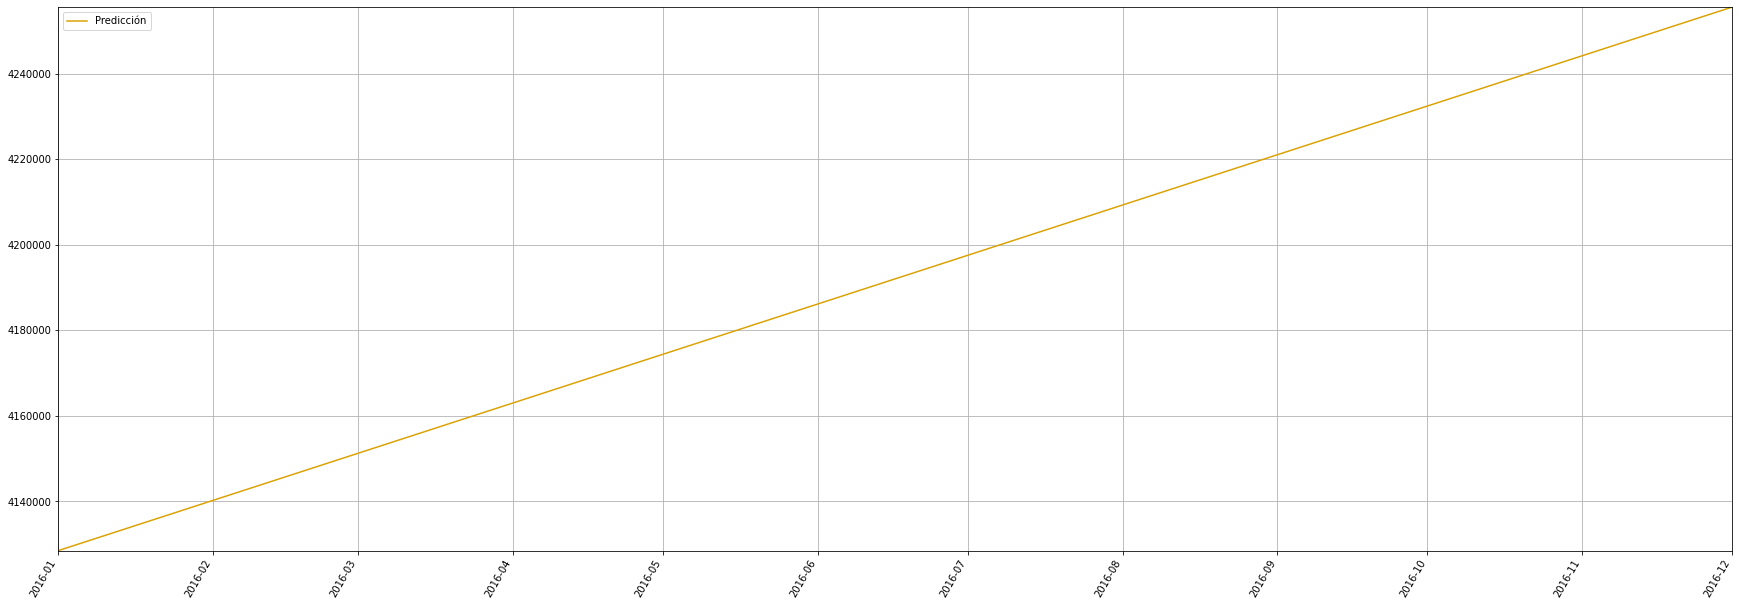

In [ ]:
plt.plot(df_pred_future['Date'] , df_pred_future['Prediction'], label="Predicción",color="#dba204")

plt.rcParams["figure.figsize"] = (30,10)
plt.grid(True)
plt.xticks(rotation=60,ha="right")
plt.ticklabel_format(style='sci', axis='y', scilimits=(-1000000,1000000))

plt.margins(0)
plt.legend()

#**CONCLUSIONES**

Codigo para realizar las capturas para la parte de conclusiones del informe

Numero de vuelos por region

+-------------------+-----+
|          GEORegion|count|
+-------------------+-----+
|             Europe| 2089|
|    Central America|  274|
|                 US| 5797|
|      South America|   90|
|             Mexico| 1115|
|        Middle East|  214|
|             Canada| 1418|
|Australia / Oceania|  737|
|               Asia| 3273|
+-------------------+-----+



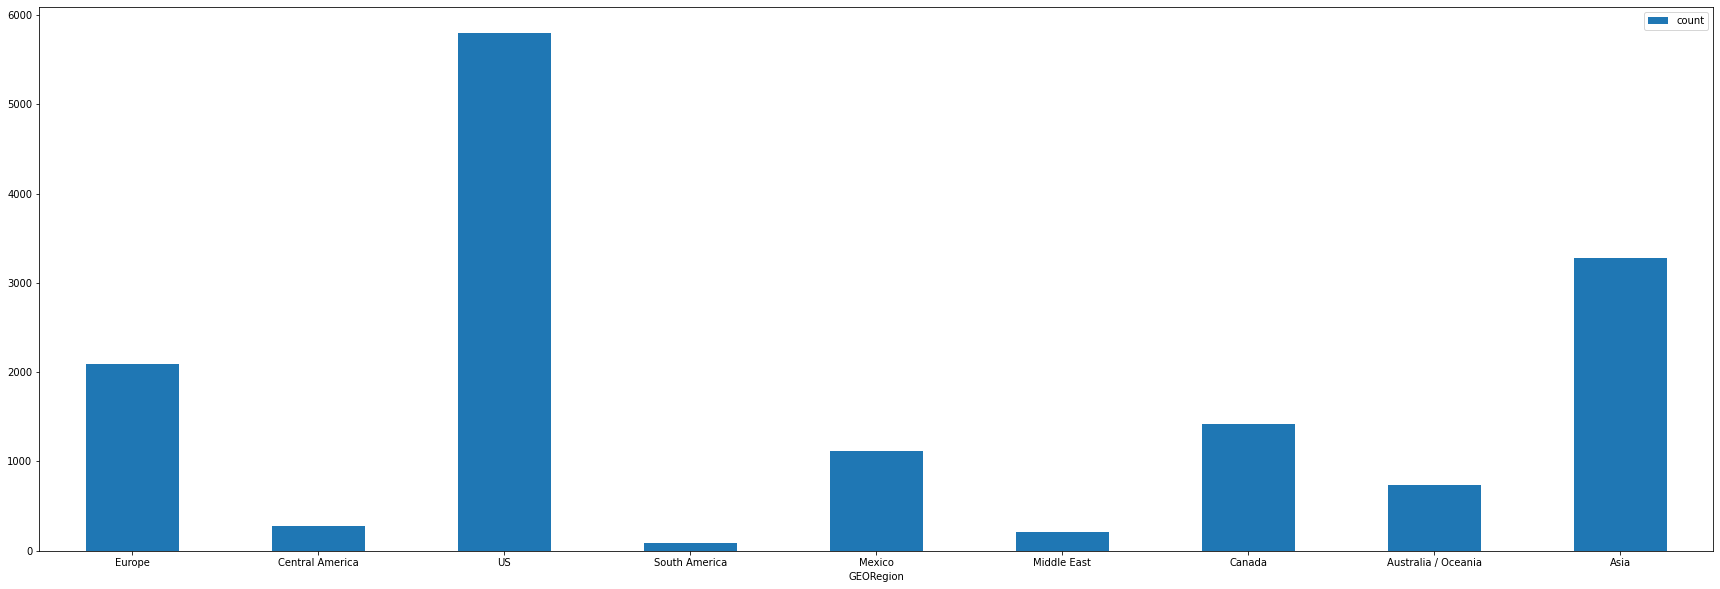

In [ ]:
GEO_Region=df_airport.groupby('GEORegion').count()
GEO_Region.show()

GEO_Region_pd = GEO_Region.toPandas()

ax = GEO_Region_pd.plot.bar(x='GEORegion', y='count', rot=0)

plt.rcParams["figure.figsize"] = (10,5)

plt.show()

tipo de vuelo

+-------------+-----+
|   GEOSummary|count|
+-------------+-----+
|International| 9210|
|     Domestic| 5797|
+-------------+-----+



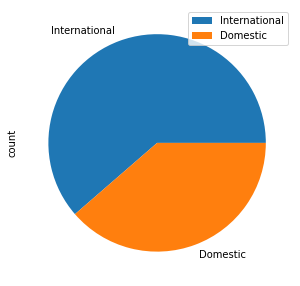

In [ ]:
GEO_Summary=df_airport.groupby('GEOSummary').count()
GEO_Summary.show()

GEO_Summary_pd = GEO_Summary.toPandas()

labels=['International','Domestic']
plot = GEO_Summary_pd.plot.pie(y="count", figsize=(5, 5), labels=labels)


Numero de pasajeros por region

+-------------------+---------------------------+
|          GEORegion|sum(AdjustedPassengerCount)|
+-------------------+---------------------------+
|             Europe|                   26695446|
|    Central America|                    1355400|
|                 US|                  339042637|
|      South America|                     250741|
|             Mexico|                    8084752|
|        Middle East|                    1852943|
|             Canada|                   13901776|
|Australia / Oceania|                    4786892|
|               Asia|                   44213493|
+-------------------+---------------------------+



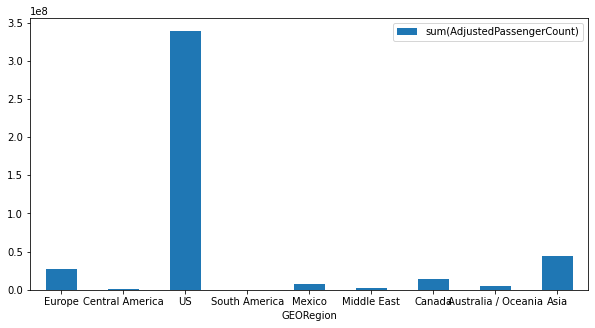

In [ ]:
passenger_by_region = df_airport.groupBy("GEORegion").sum("AdjustedPassengerCount")
passenger_by_region.show()

passenger_by_region_pd = passenger_by_region.toPandas()

ax = passenger_by_region_pd.plot.bar(x='GEORegion', y='sum(AdjustedPassengerCount)', rot=0)

plt.rcParams["figure.figsize"] = (10,5)

plt.show()

#**PRESENTACIÓN**

Codigo para realizar las capturas para la presentación

In [ ]:
import matplotlib.patches as mpatches

In [ ]:
df_airport_pd = df_airport.toPandas()

##Descriptivo

PERIODO ACTIVIDAD

In [ ]:
df_airport_pd.query("ActivityPeriod == 200807")


,ActivityPeriod,OperatingAirline,OperatingAirlineIATACode,PublishedAirline,PublishedAirlineIATACode,GEOSummary,GEORegion,ActivityTypeCode,PriceCategoryCode,Terminal,BoardingArea,PassengerCount,AdjustedActivityTypeCode,AdjustedPassengerCount,Year,Month
4189,200807,Aer Lingus,EI,Aer Lingus,EI,International,Europe,Deplaned,Other,International,A,6263,Deplaned,6263,2008,July
4190,200807,Aer Lingus,EI,Aer Lingus,EI,International,Europe,Enplaned,Other,International,A,5305,Enplaned,5305,2008,July
4191,200807,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 3,E,36389,Deplaned,36389,2008,July
4192,200807,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 3,E,28294,Enplaned,28294,2008,July
4193,200807,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6789,Deplaned,6789,2008,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,200807,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Mexico,Thru / Transit,Other,International,G,74,Thru / Transit * 2,148,2008,July
4314,200807,Virgin America,VX,Virgin America,VX,Domestic,US,Deplaned,Low Fare,International,A,97257,Deplaned,97257,2008,July
4315,200807,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,International,A,97157,Enplaned,97157,2008,July
4316,200807,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,10576,Deplaned,10576,2008,July


MES

<ipython-input-119-598bffb25b12>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(x=grouped_dataframe['AdjustedPassengerCount'],labels=labels4,radius=1,autopct='%1.1f%%',colors=colors)


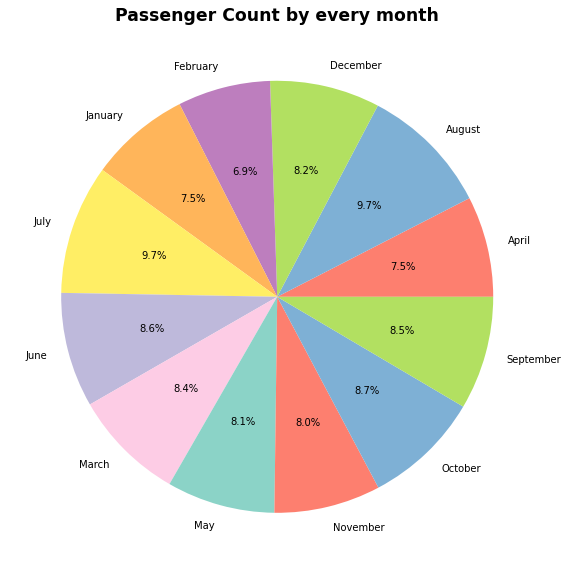

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
grouped_dataframe=df_airport_pd.groupby("Month").agg({'AdjustedPassengerCount' : ['sum']})

labels4=grouped_dataframe.index
colors= ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

plt.pie(x=grouped_dataframe['AdjustedPassengerCount'],labels=labels4,radius=1,autopct='%1.1f%%',colors=colors)
plt.title("Passenger Count by every month",fontsize='xx-large',fontweight='heavy')

plt.show()


<ipython-input-120-e8ccea5ec05f>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(x=passenger_count_month['Month'],labels=labels4,radius=1,autopct='%1.1f%%',colors=colors)


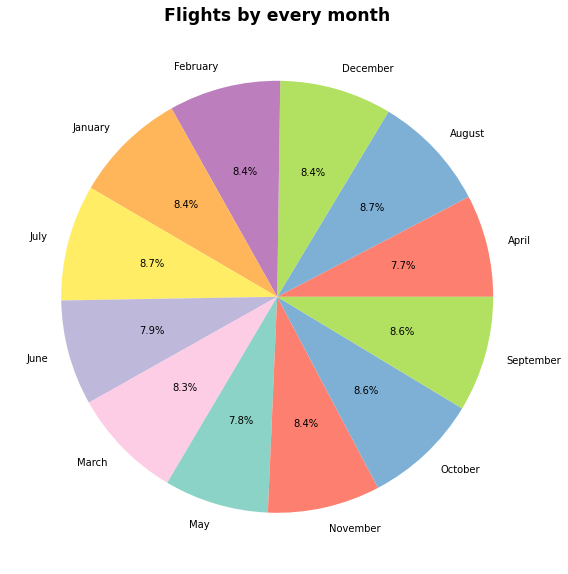

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
passenger_count_month=df_airport_pd.groupby("Month").agg({'Month' : ['count']})

labels4=passenger_count_month.index
colors= ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

plt.pie(x=passenger_count_month['Month'],labels=labels4,radius=1,autopct='%1.1f%%',colors=colors)
plt.title("Flights by every month",fontsize='xx-large',fontweight='heavy')

plt.show()


AÑO

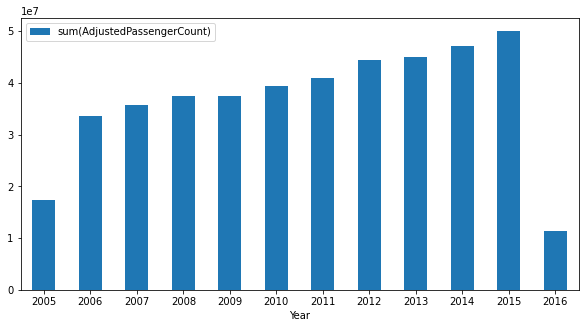

In [ ]:
grouped_dataframe = df_airport.groupBy("Year").sum("AdjustedPassengerCount")

grouped_dataframe_pd = grouped_dataframe.toPandas()
grouped_dataframe_pd = grouped_dataframe_pd.sort_values(by=["Year"])

ax = grouped_dataframe_pd.plot.bar(x='Year', y='sum(AdjustedPassengerCount)', rot=0)

plt.rcParams["figure.figsize"] = (10,5)

plt.show()

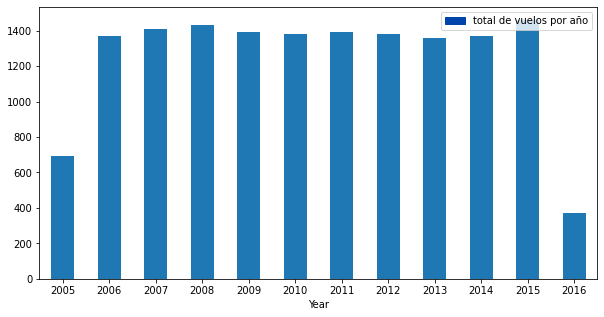

In [ ]:
grouped_dataframe = df_airport.groupBy("Year").count()

grouped_dataframe_pd = grouped_dataframe.toPandas()
grouped_dataframe_pd = grouped_dataframe_pd.sort_values(by=["Year"])

ax = grouped_dataframe_pd.plot.bar(x='Year', y='count', rot=0)

legend = mpatches.Patch(color='#0145ac', label='total de vuelos por año')
ax.legend(handles=[legend],  loc='upper right')

plt.rcParams["figure.figsize"] = (10,5)

plt.show()


ADJUSTED PASSENGER COUNT

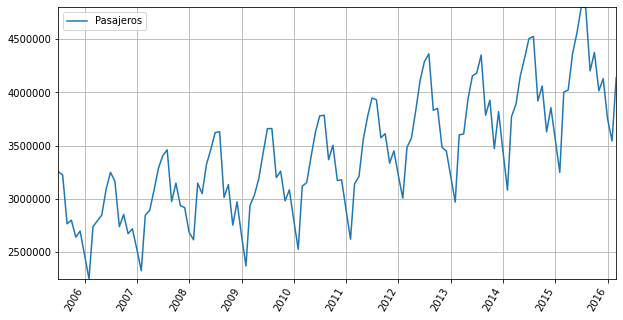

In [ ]:
plt.plot(df_pass_by_year_pd['Date'] , df_pass_by_year_pd['AdjustedPassengerCountSum'], label="Pasajeros")
plt.rcParams["figure.figsize"] = (20,10)
plt.grid(True)
plt.xticks(rotation=60,ha="right")
plt.ticklabel_format(style='sci', axis='y', scilimits=(-1000000,1000000))
plt.margins(0)
plt.legend()

PASSENGER COUNT VS ADJUSTED

In [ ]:
from pyspark.sql.functions import sum
pass_comparison = df_airport.groupBy("Year" , "Month").agg(sum("AdjustedPassengerCount").alias("AdjustedPassengerCountSum"),sum("PassengerCount").alias("PassengerCountSum"))
pass_comparison.show()

+----+---------+-------------------------+-----------------+
|Year|    Month|AdjustedPassengerCountSum|PassengerCountSum|
+----+---------+-------------------------+-----------------+
|2006|September|                  2738319|          2720100|
|2007|      May|                  3080467|          3056934|
|2012| February|                  3005764|          2998119|
|2008|    April|                  3048005|          3029021|
|2006|  October|                  2851945|          2834959|
|2011| November|                  3334801|          3326859|
|2006| February|                  2247255|          2223024|
|2014|     July|                  4506218|          4499221|
|2011|   August|                  3930681|          3917884|
|2007| December|                  2917258|          2903637|
|2013|   August|                  4351101|          4347059|
|2009| February|                  2368782|          2359800|
|2014|      May|                  4151403|          4147096|
|2011|  October|        

GEO Summary

<ipython-input-125-a394bb82462f>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(x=grouped_dataframe['AdjustedPassengerCount'],labels=labels4,radius=0.5,autopct='%1.1f%%',colors=colors)


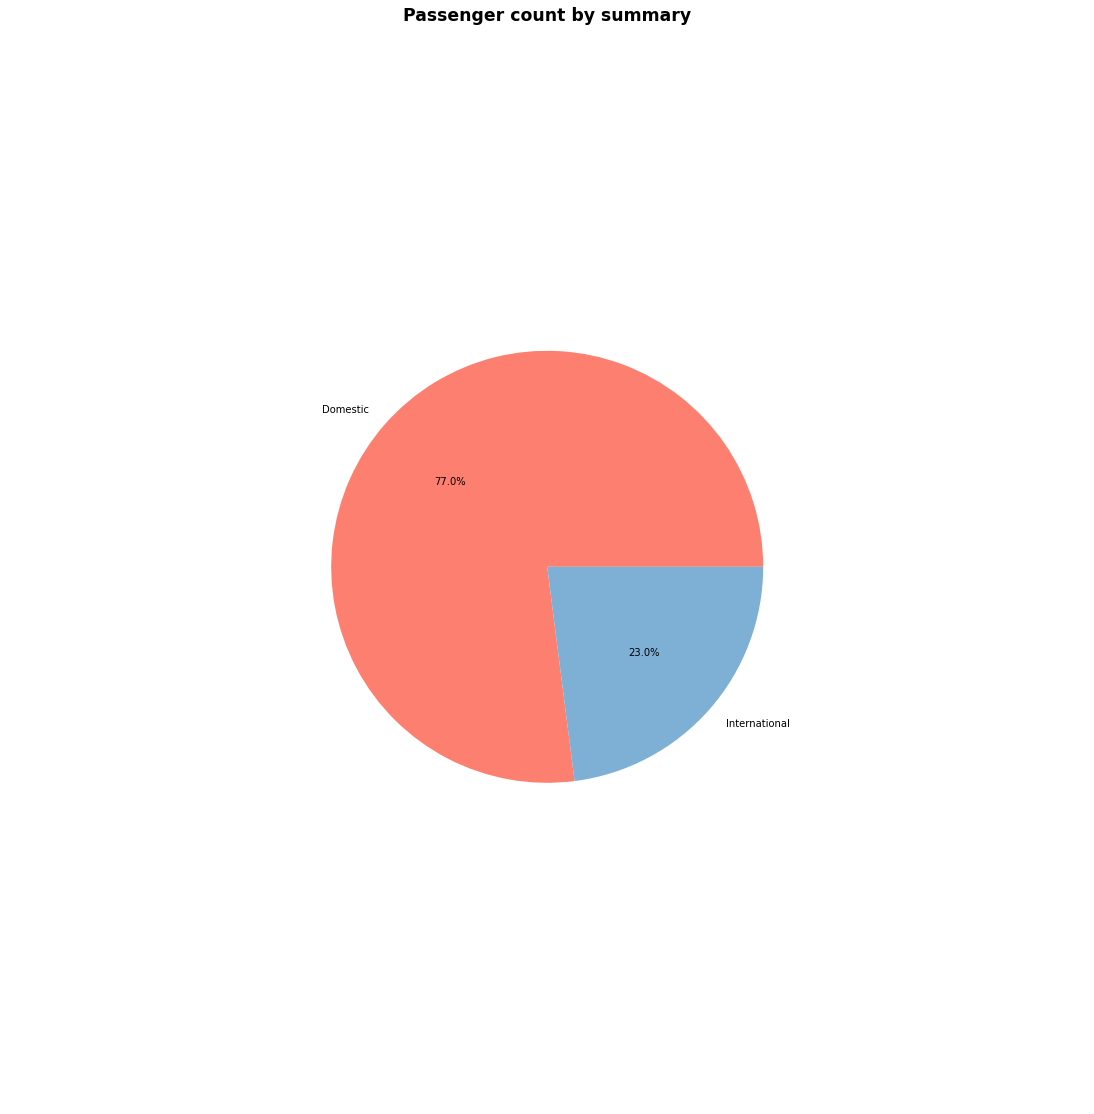

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

grouped_dataframe=df_airport_pd.groupby("GEOSummary").agg({'AdjustedPassengerCount' : ['sum']})

labels4=grouped_dataframe.index
colors= ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

plt.pie(x=grouped_dataframe['AdjustedPassengerCount'],labels=labels4,radius=0.5,autopct='%1.1f%%',colors=colors)
plt.title("Passenger count by summary",fontsize='xx-large',fontweight='heavy')

plt.show()


<ipython-input-126-d8c3567c2d69>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(x=grouped_dataframe['GEOSummary'],labels=labels4,radius=0.3,autopct='%1.1f%%',colors=colors)


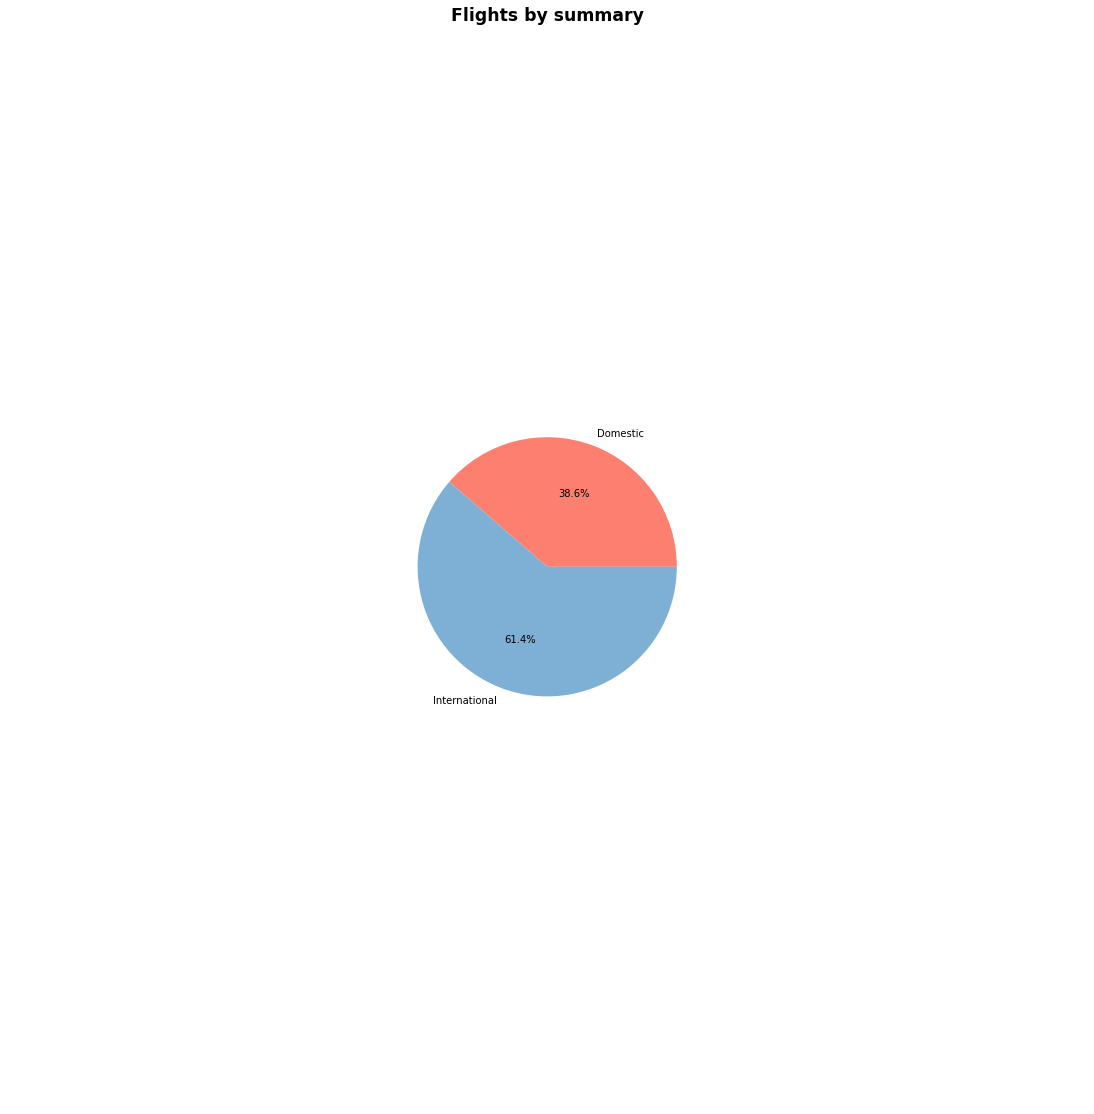

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

grouped_dataframe=df_airport_pd.groupby("GEOSummary").agg({'GEOSummary' : ['count']})

labels4=grouped_dataframe.index
colors= ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

plt.pie(x=grouped_dataframe['GEOSummary'],labels=labels4,radius=0.3,autopct='%1.1f%%',colors=colors)
plt.title("Flights by summary",fontsize='xx-large',fontweight='heavy')

plt.show()

BOARDING AREA

<ipython-input-127-917c879b6ecc>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(x=grouped_dataframe['AdjustedPassengerCount'],labels=labels4,radius=0.5,autopct='%1.1f%%',colors=colors)


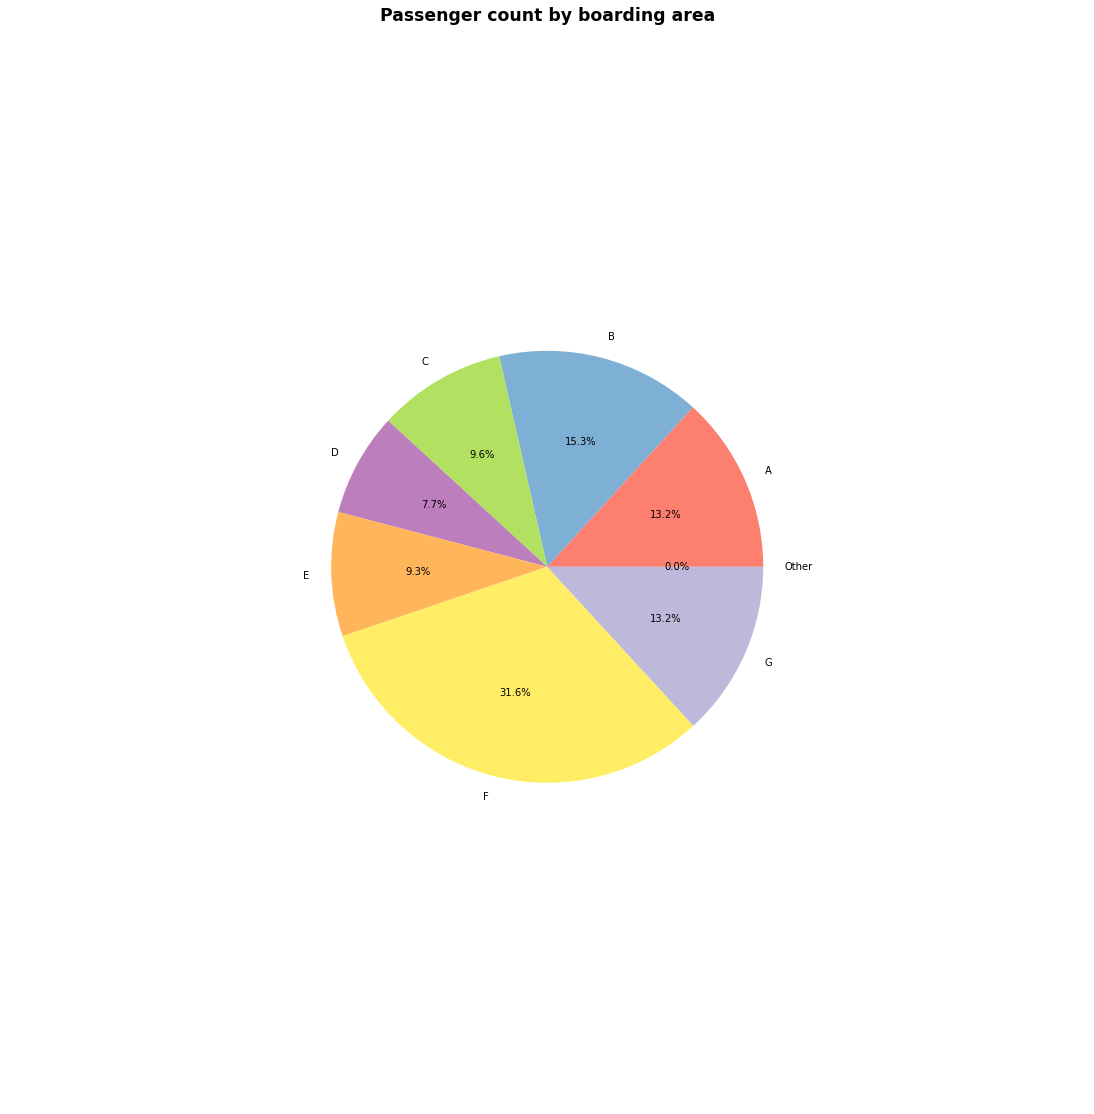

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

grouped_dataframe=df_airport_pd.groupby("BoardingArea").agg({'AdjustedPassengerCount' : ['sum']})

labels4=grouped_dataframe.index
colors= ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

plt.pie(x=grouped_dataframe['AdjustedPassengerCount'],labels=labels4,radius=0.5,autopct='%1.1f%%',colors=colors)
plt.title("Passenger count by boarding area",fontsize='xx-large',fontweight='heavy')

plt.show()


<ipython-input-128-f3c570c9f3d5>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(x=grouped_dataframe['BoardingArea'],labels=labels4,radius=0.35,autopct='%1.1f%%',colors=colors)


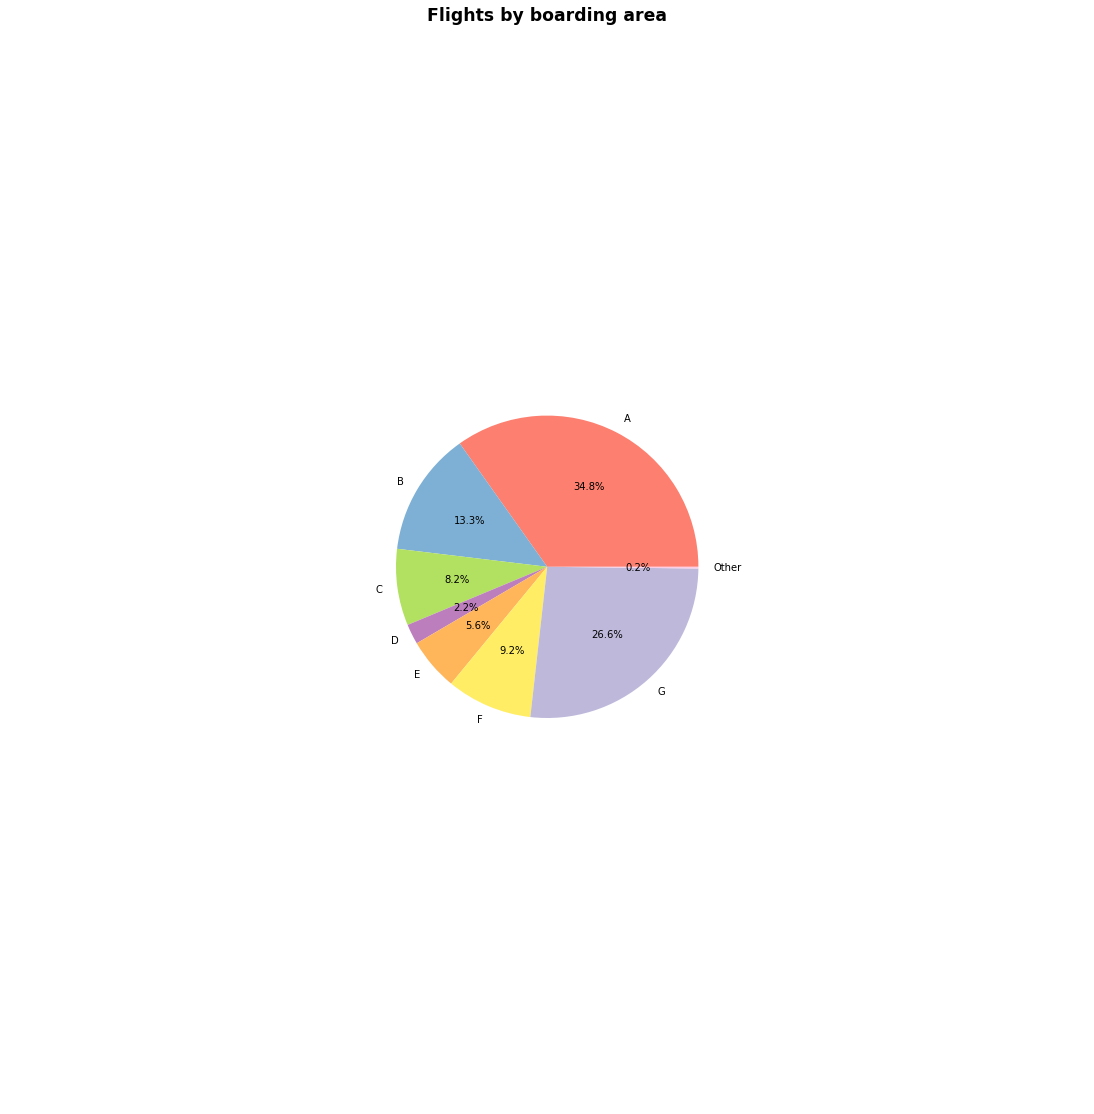

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

grouped_dataframe=df_airport_pd.groupby("BoardingArea").agg({'BoardingArea' : ['count']})

labels4=grouped_dataframe.index
colors= ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

plt.pie(x=grouped_dataframe['BoardingArea'],labels=labels4,radius=0.35,autopct='%1.1f%%',colors=colors)
plt.title("Flights by boarding area",fontsize='xx-large',fontweight='heavy')

plt.show()

TERMINAL

<ipython-input-129-2cfd7cb96f64>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(x=grouped_dataframe['AdjustedPassengerCount'],labels=labels4,radius=0.5,autopct='%1.1f%%',colors=colors)


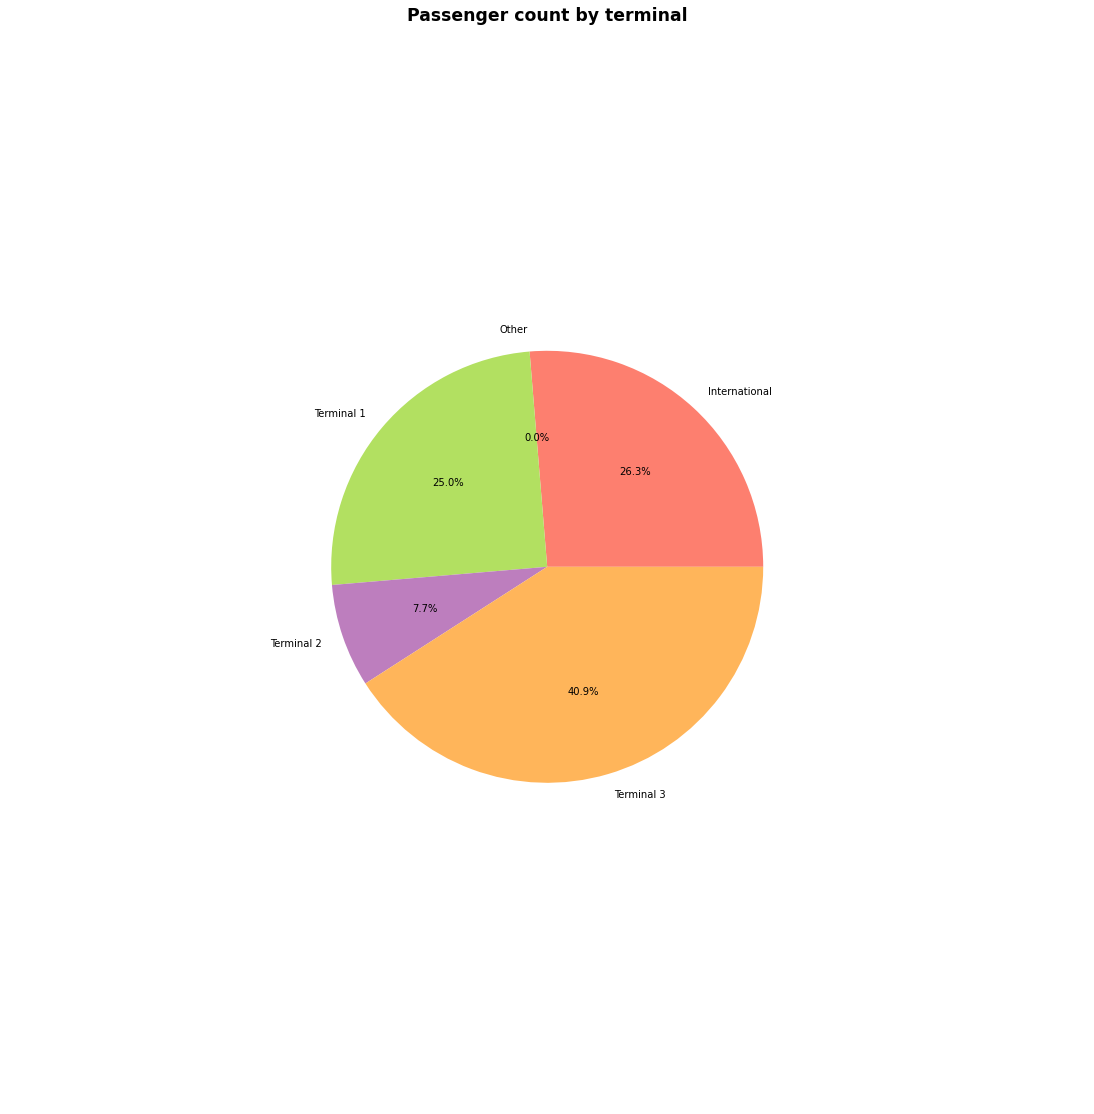

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

grouped_dataframe=df_airport_pd.groupby("Terminal").agg({'AdjustedPassengerCount' : ['sum']})

labels4=grouped_dataframe.index
colors= ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

plt.pie(x=grouped_dataframe['AdjustedPassengerCount'],labels=labels4,radius=0.5,autopct='%1.1f%%',colors=colors)
plt.title("Passenger count by terminal",fontsize='xx-large',fontweight='heavy')

plt.show()

<ipython-input-130-438340313067>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(x=grouped_dataframe['Terminal'],labels=labels4,radius=0.35,autopct='%1.1f%%',colors=colors)


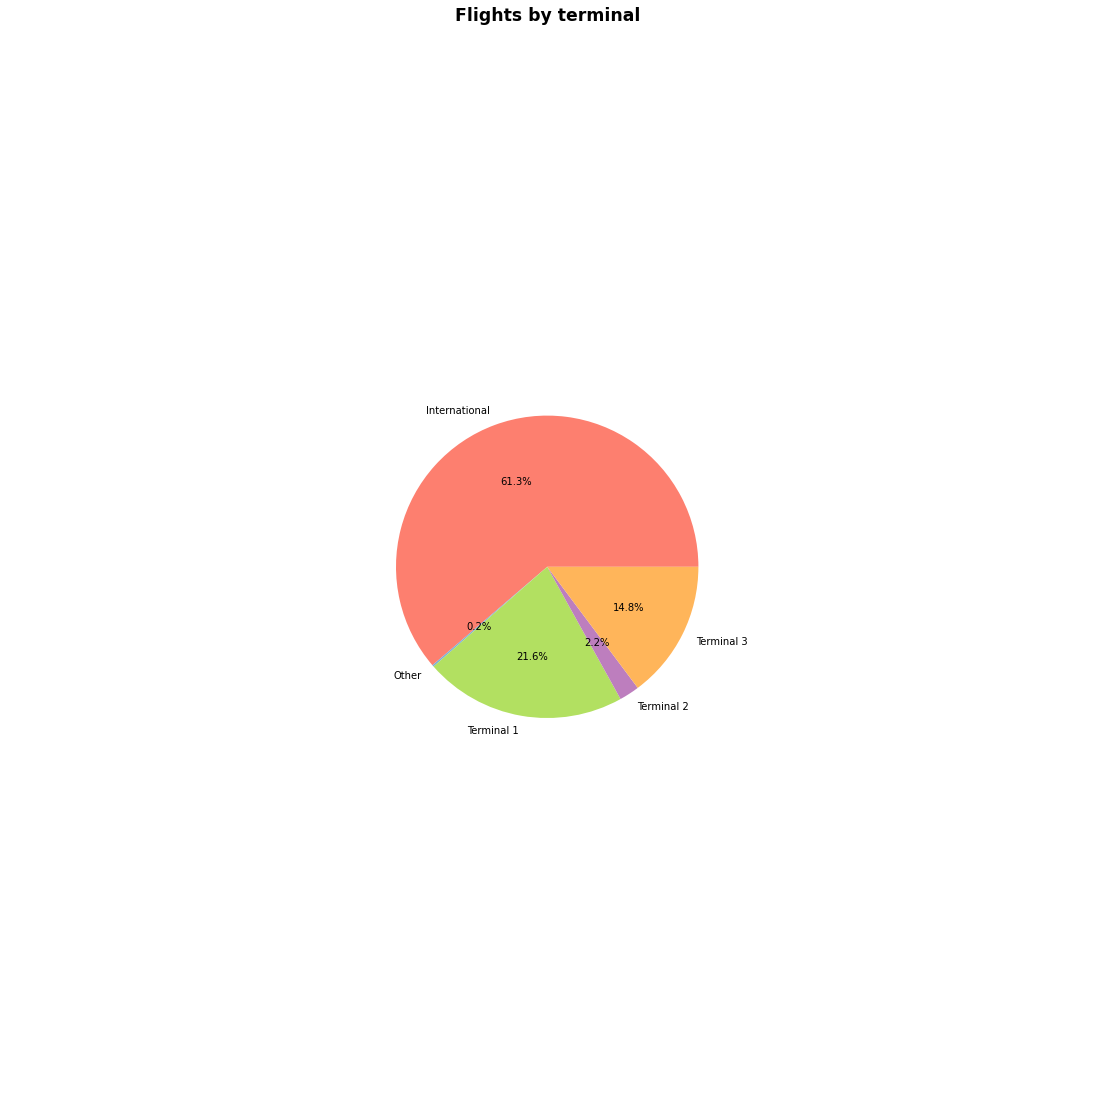

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

grouped_dataframe=df_airport_pd.groupby("Terminal").agg({'Terminal' : ['count']})

labels4=grouped_dataframe.index
colors= ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

plt.pie(x=grouped_dataframe['Terminal'],labels=labels4,radius=0.35,autopct='%1.1f%%',colors=colors)
plt.title("Flights by terminal",fontsize='xx-large',fontweight='heavy')

plt.show()

PRICE CATEGORY CODE

<ipython-input-131-e57bc4917bf3>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(x=grouped_dataframe['AdjustedPassengerCount'],labels=labels4,radius=0.5,autopct='%1.1f%%',colors=colors)


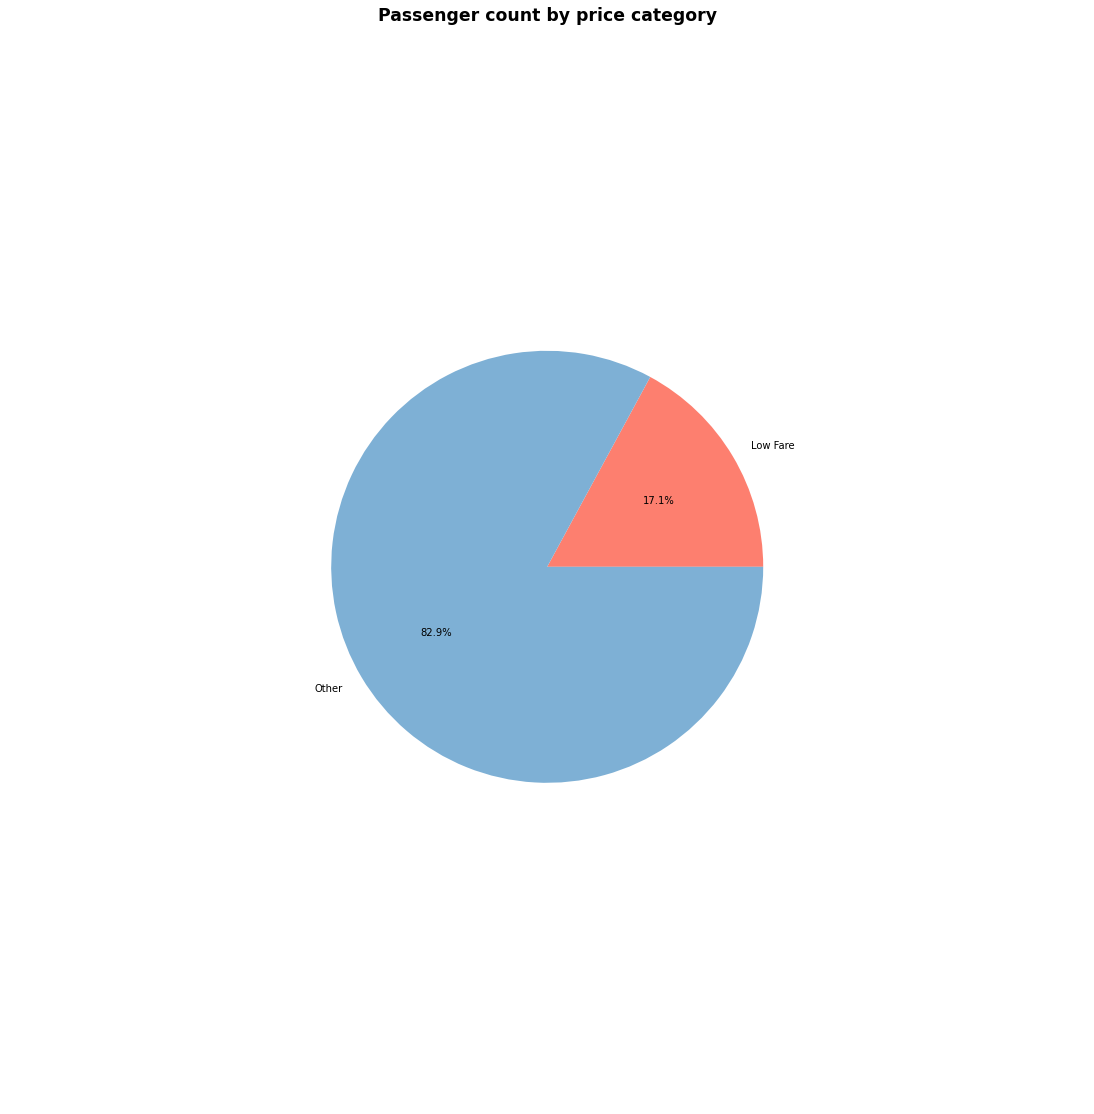

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

grouped_dataframe=df_airport_pd.groupby("PriceCategoryCode").agg({'AdjustedPassengerCount' : ['sum']})

labels4=grouped_dataframe.index
colors= ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

plt.pie(x=grouped_dataframe['AdjustedPassengerCount'],labels=labels4,radius=0.5,autopct='%1.1f%%',colors=colors)
plt.title("Passenger count by price category",fontsize='xx-large',fontweight='heavy')

plt.show()

<ipython-input-132-5708e31a595d>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(x=grouped_dataframe['PriceCategoryCode'],labels=labels4,radius=0.35,autopct='%1.1f%%',colors=colors)


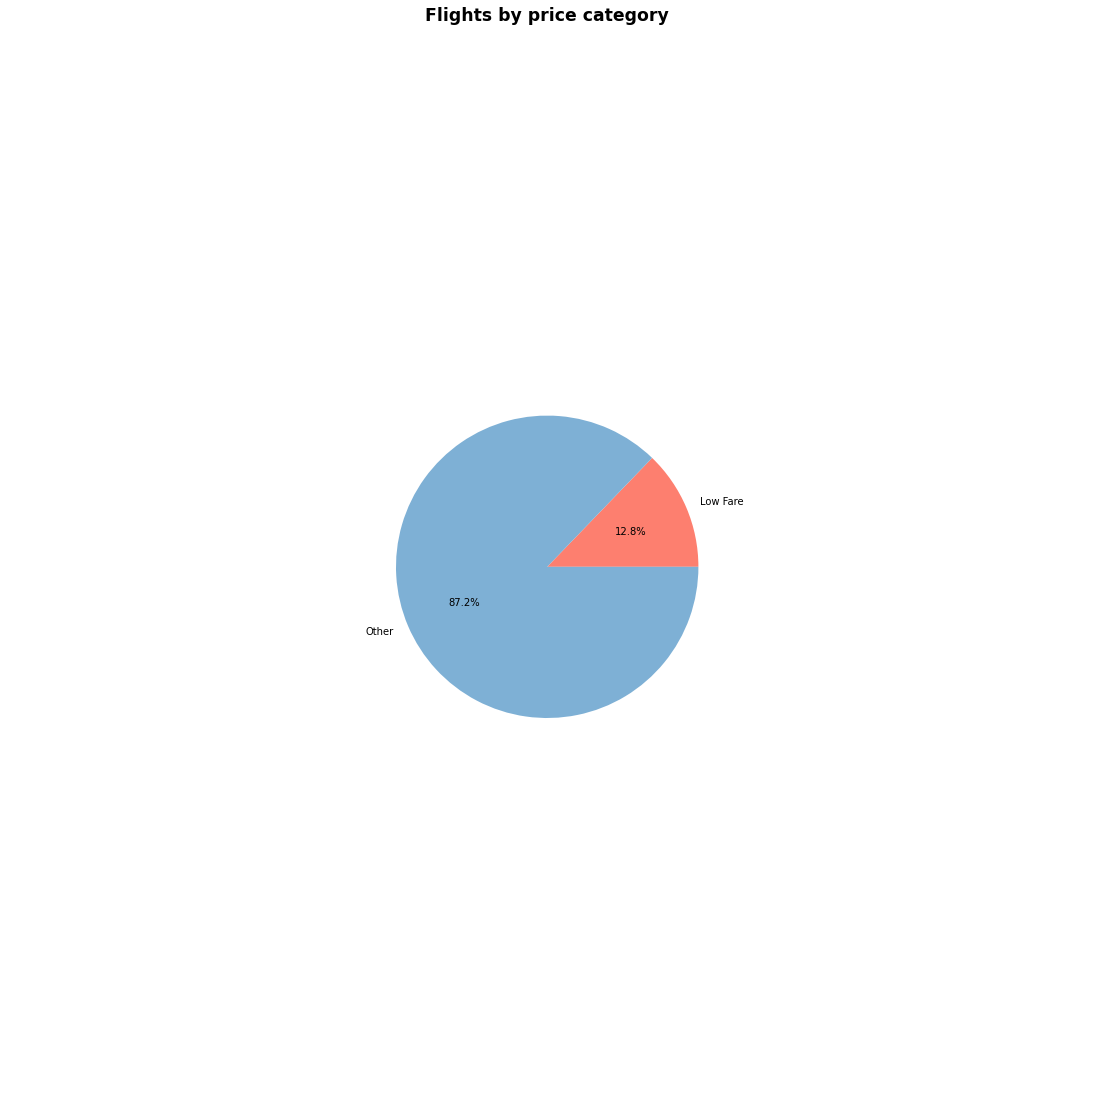

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

grouped_dataframe=df_airport_pd.groupby("PriceCategoryCode").agg({'PriceCategoryCode' : ['count']})

labels4=grouped_dataframe.index
colors= ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

plt.pie(x=grouped_dataframe['PriceCategoryCode'],labels=labels4,radius=0.35,autopct='%1.1f%%',colors=colors)
plt.title("Flights by price category",fontsize='xx-large',fontweight='heavy')

plt.show()

ACTIVITY TYPE

<ipython-input-133-875c32e76aee>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(x=grouped_dataframe['AdjustedPassengerCount'],labels=labels4,radius=0.5,autopct='%1.1f%%',colors=colors)


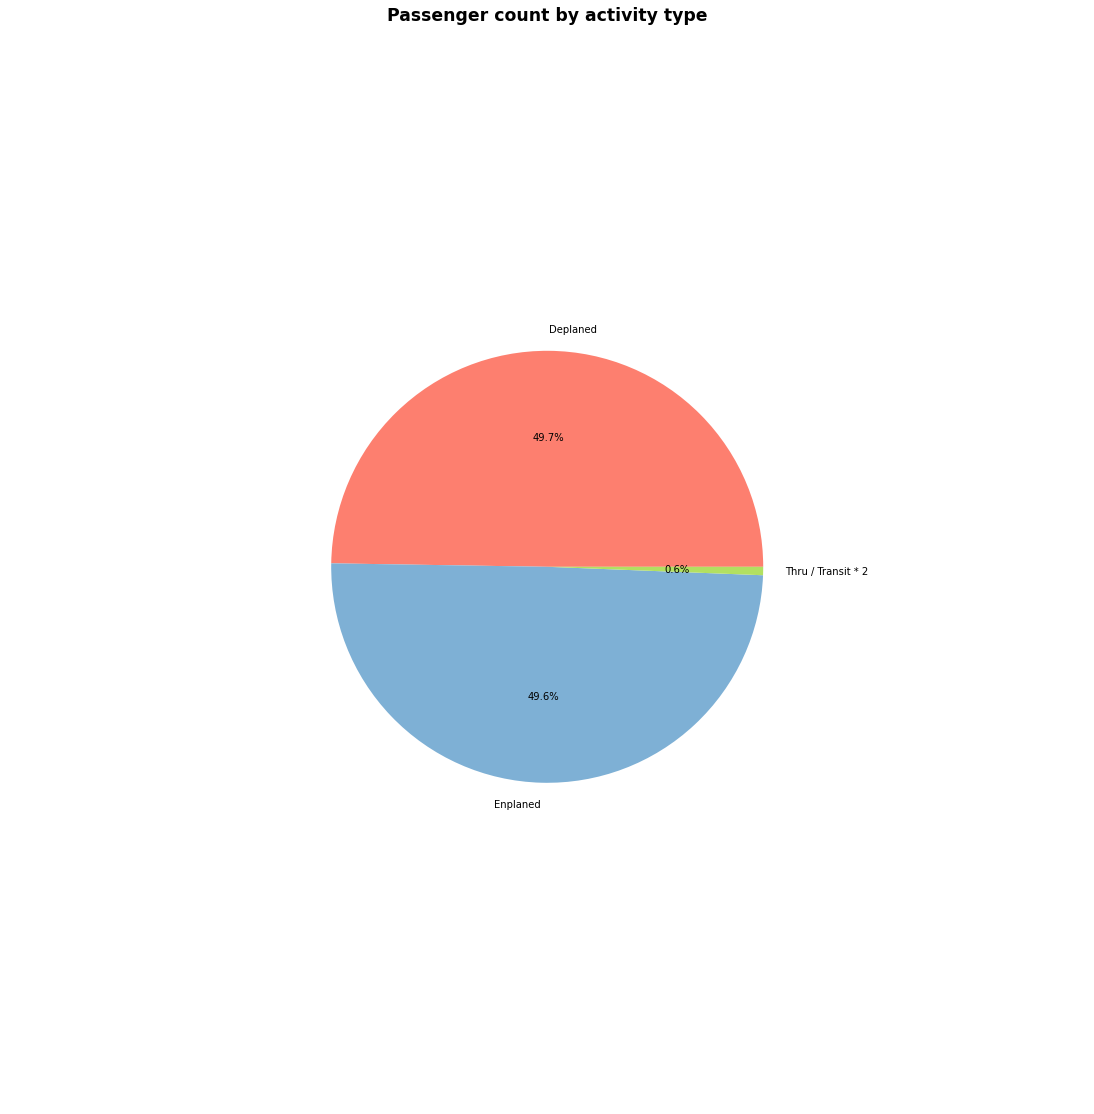

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

grouped_dataframe=df_airport_pd.groupby("AdjustedActivityTypeCode").agg({'AdjustedPassengerCount' : ['sum']})

labels4=grouped_dataframe.index
colors= ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

plt.pie(x=grouped_dataframe['AdjustedPassengerCount'],labels=labels4,radius=0.5,autopct='%1.1f%%',colors=colors)
plt.title("Passenger count by activity type",fontsize='xx-large',fontweight='heavy')

plt.show()

<ipython-input-134-456919b5a69a>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(x=grouped_dataframe['AdjustedPassengerCount'],labels=labels4,radius=0.5,autopct='%1.1f%%',colors=colors)


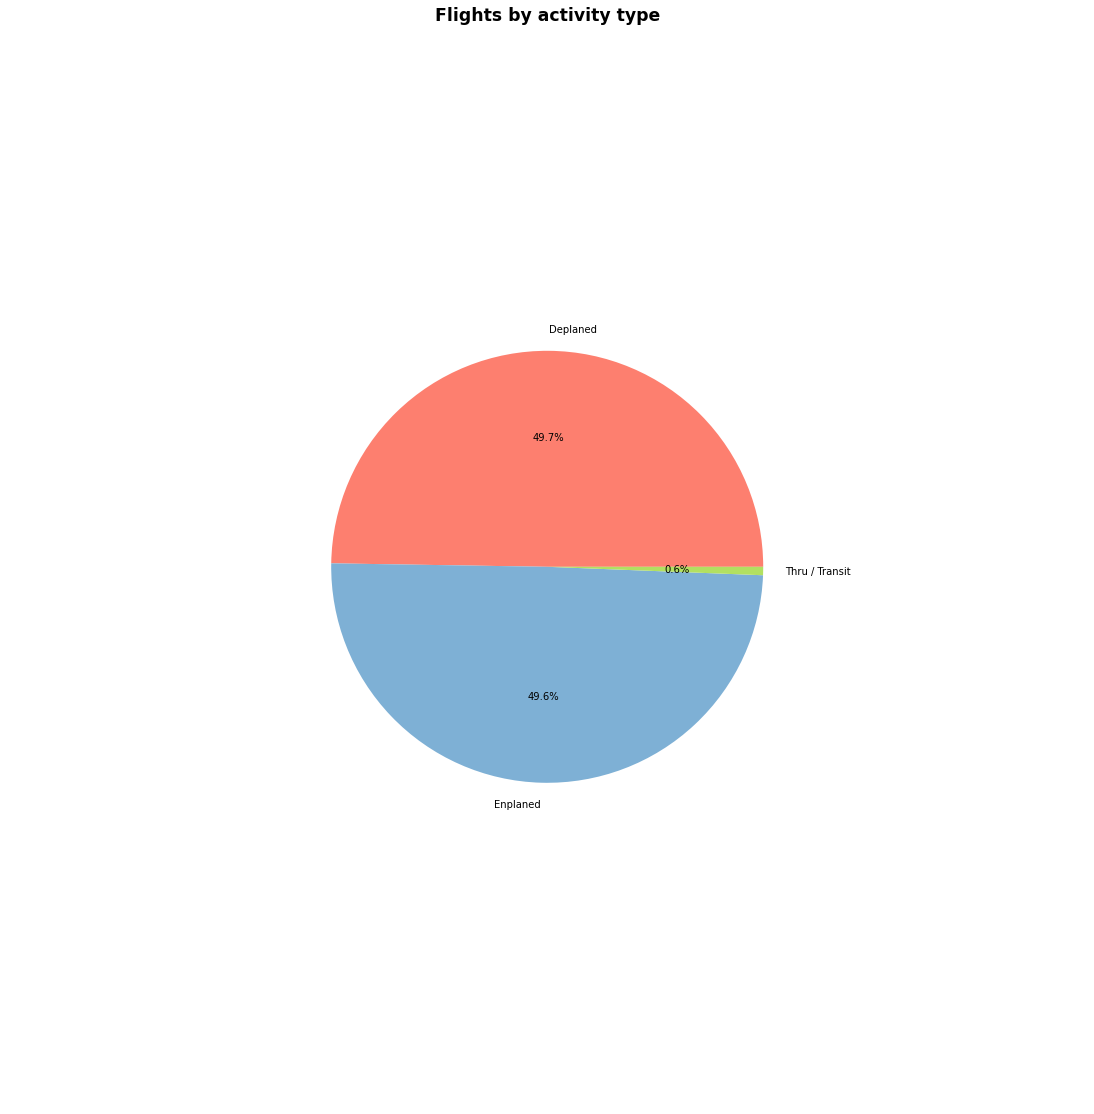

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

grouped_dataframe=df_airport_pd.groupby("ActivityTypeCode").agg({'AdjustedPassengerCount' : ['sum']})

labels4=grouped_dataframe.index
colors= ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

plt.pie(x=grouped_dataframe['AdjustedPassengerCount'],labels=labels4,radius=0.5,autopct='%1.1f%%',colors=colors)
plt.title("Flights by activity type",fontsize='xx-large',fontweight='heavy')

plt.show()

<ipython-input-135-84f5157474b7>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(x=grouped_dataframe['ActivityTypeCode'],labels=labels4,radius=0.4,autopct='%1.1f%%',colors=colors)


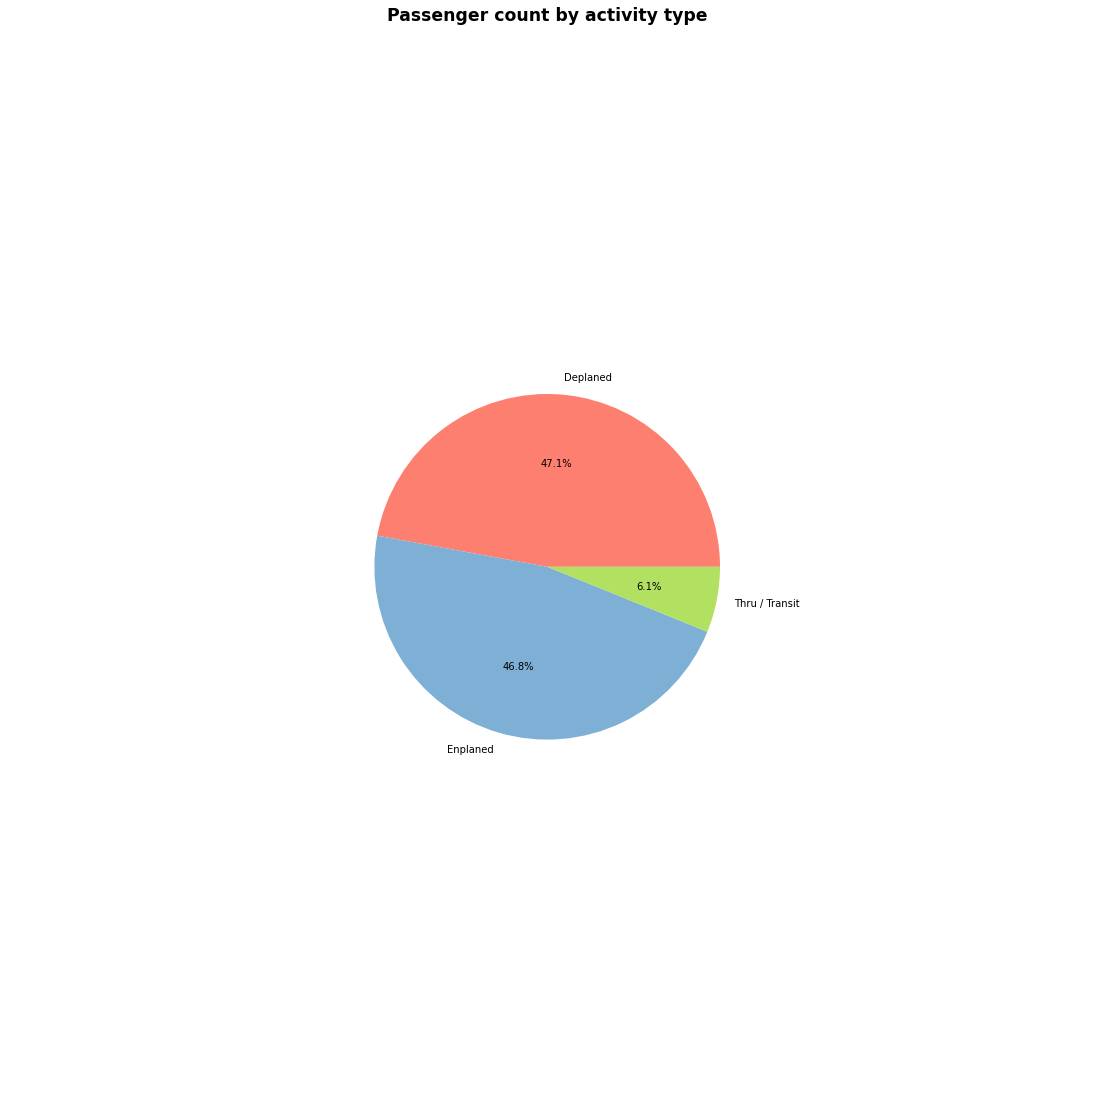

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

grouped_dataframe=df_airport_pd.groupby("ActivityTypeCode").agg({'ActivityTypeCode' : ['count']})

labels4=grouped_dataframe.index
colors= ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

plt.pie(x=grouped_dataframe['ActivityTypeCode'],labels=labels4,radius=0.4,autopct='%1.1f%%',colors=colors)
plt.title("Passenger count by activity type",fontsize='xx-large',fontweight='heavy')

plt.show()

OPERATING AIRLINE

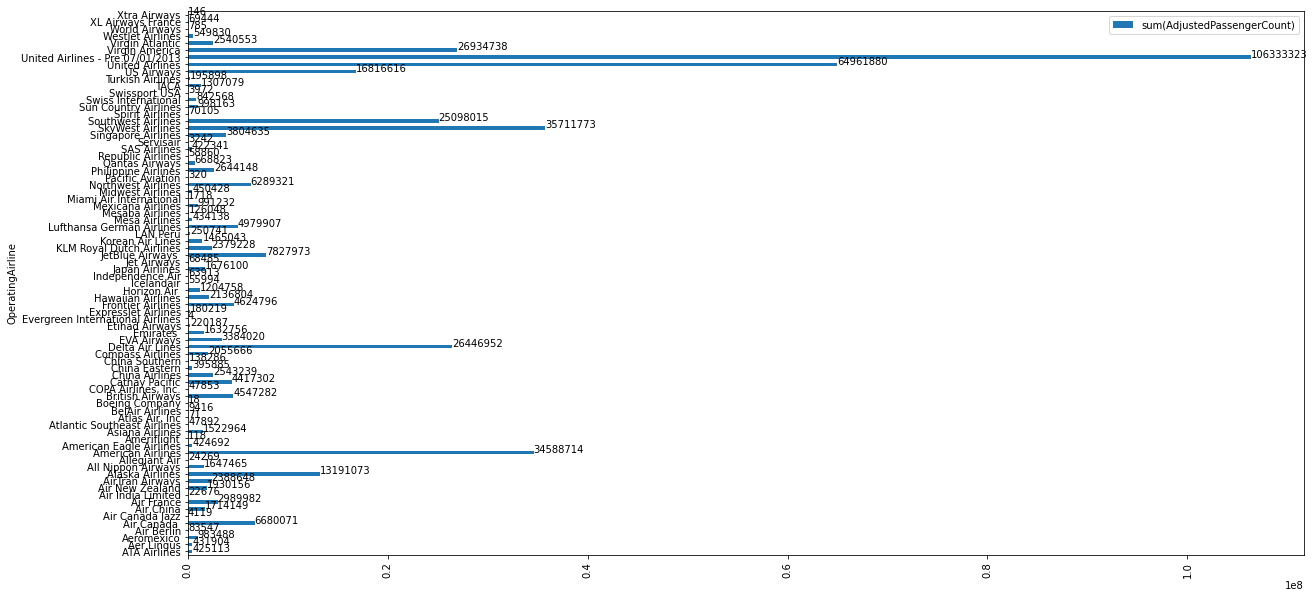

In [ ]:
grouped_dataframe = df_airport.groupBy("OperatingAirline").sum("AdjustedPassengerCount")

grouped_dataframe_pd = grouped_dataframe.toPandas()
grouped_dataframe_pd = grouped_dataframe_pd.sort_values(by=["OperatingAirline"])

ax = grouped_dataframe_pd.plot.barh(x='OperatingAirline', y='sum(AdjustedPassengerCount)', rot=0)

plt.rcParams["figure.figsize"] = (40,20)
plt.xticks(rotation=90)

for index, value in enumerate(grouped_dataframe_pd['sum(AdjustedPassengerCount)']):
    plt.text(value, index,str(value))

plt.show()

PUBLISHED AIRLINE

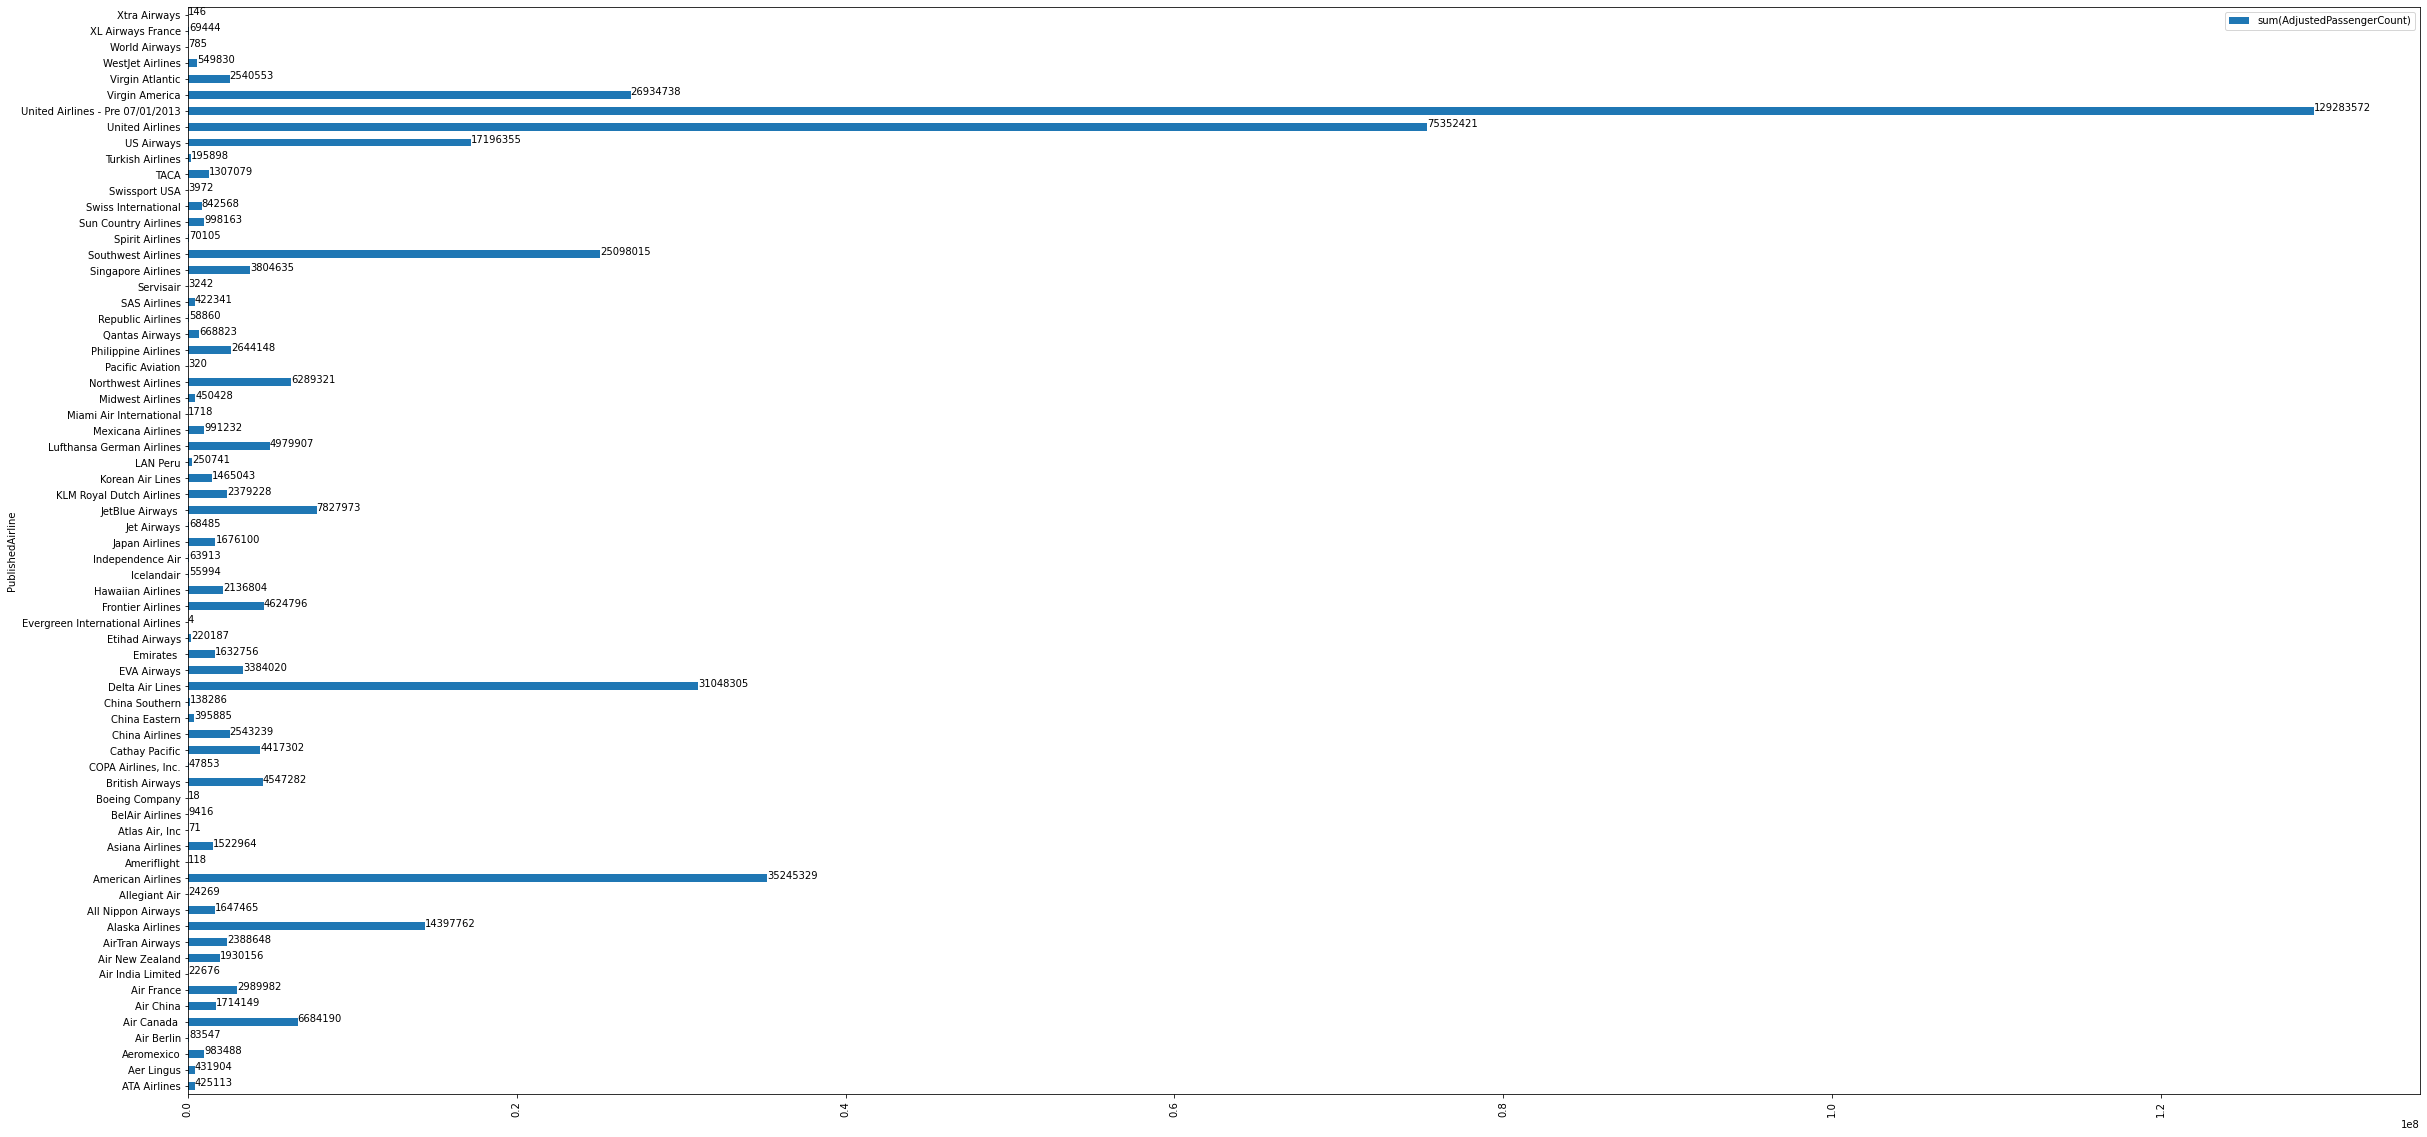

In [ ]:
grouped_dataframe = df_airport.groupBy("PublishedAirline").sum("AdjustedPassengerCount")

grouped_dataframe_pd = grouped_dataframe.toPandas()
grouped_dataframe_pd = grouped_dataframe_pd.sort_values(by=["PublishedAirline"])

ax = grouped_dataframe_pd.plot.barh(x='PublishedAirline', y='sum(AdjustedPassengerCount)', rot=0)

plt.rcParams["figure.figsize"] = (40,20)
plt.xticks(rotation=90)

for index, value in enumerate(grouped_dataframe_pd['sum(AdjustedPassengerCount)']):
    plt.text(value, index,str(value))

plt.show()

GEO REGION

+-------------------+-----+
|          GEORegion|count|
+-------------------+-----+
|             Europe| 2089|
|    Central America|  274|
|                 US| 5797|
|      South America|   90|
|             Mexico| 1115|
|        Middle East|  214|
|             Canada| 1418|
|Australia / Oceania|  737|
|               Asia| 3273|
+-------------------+-----+



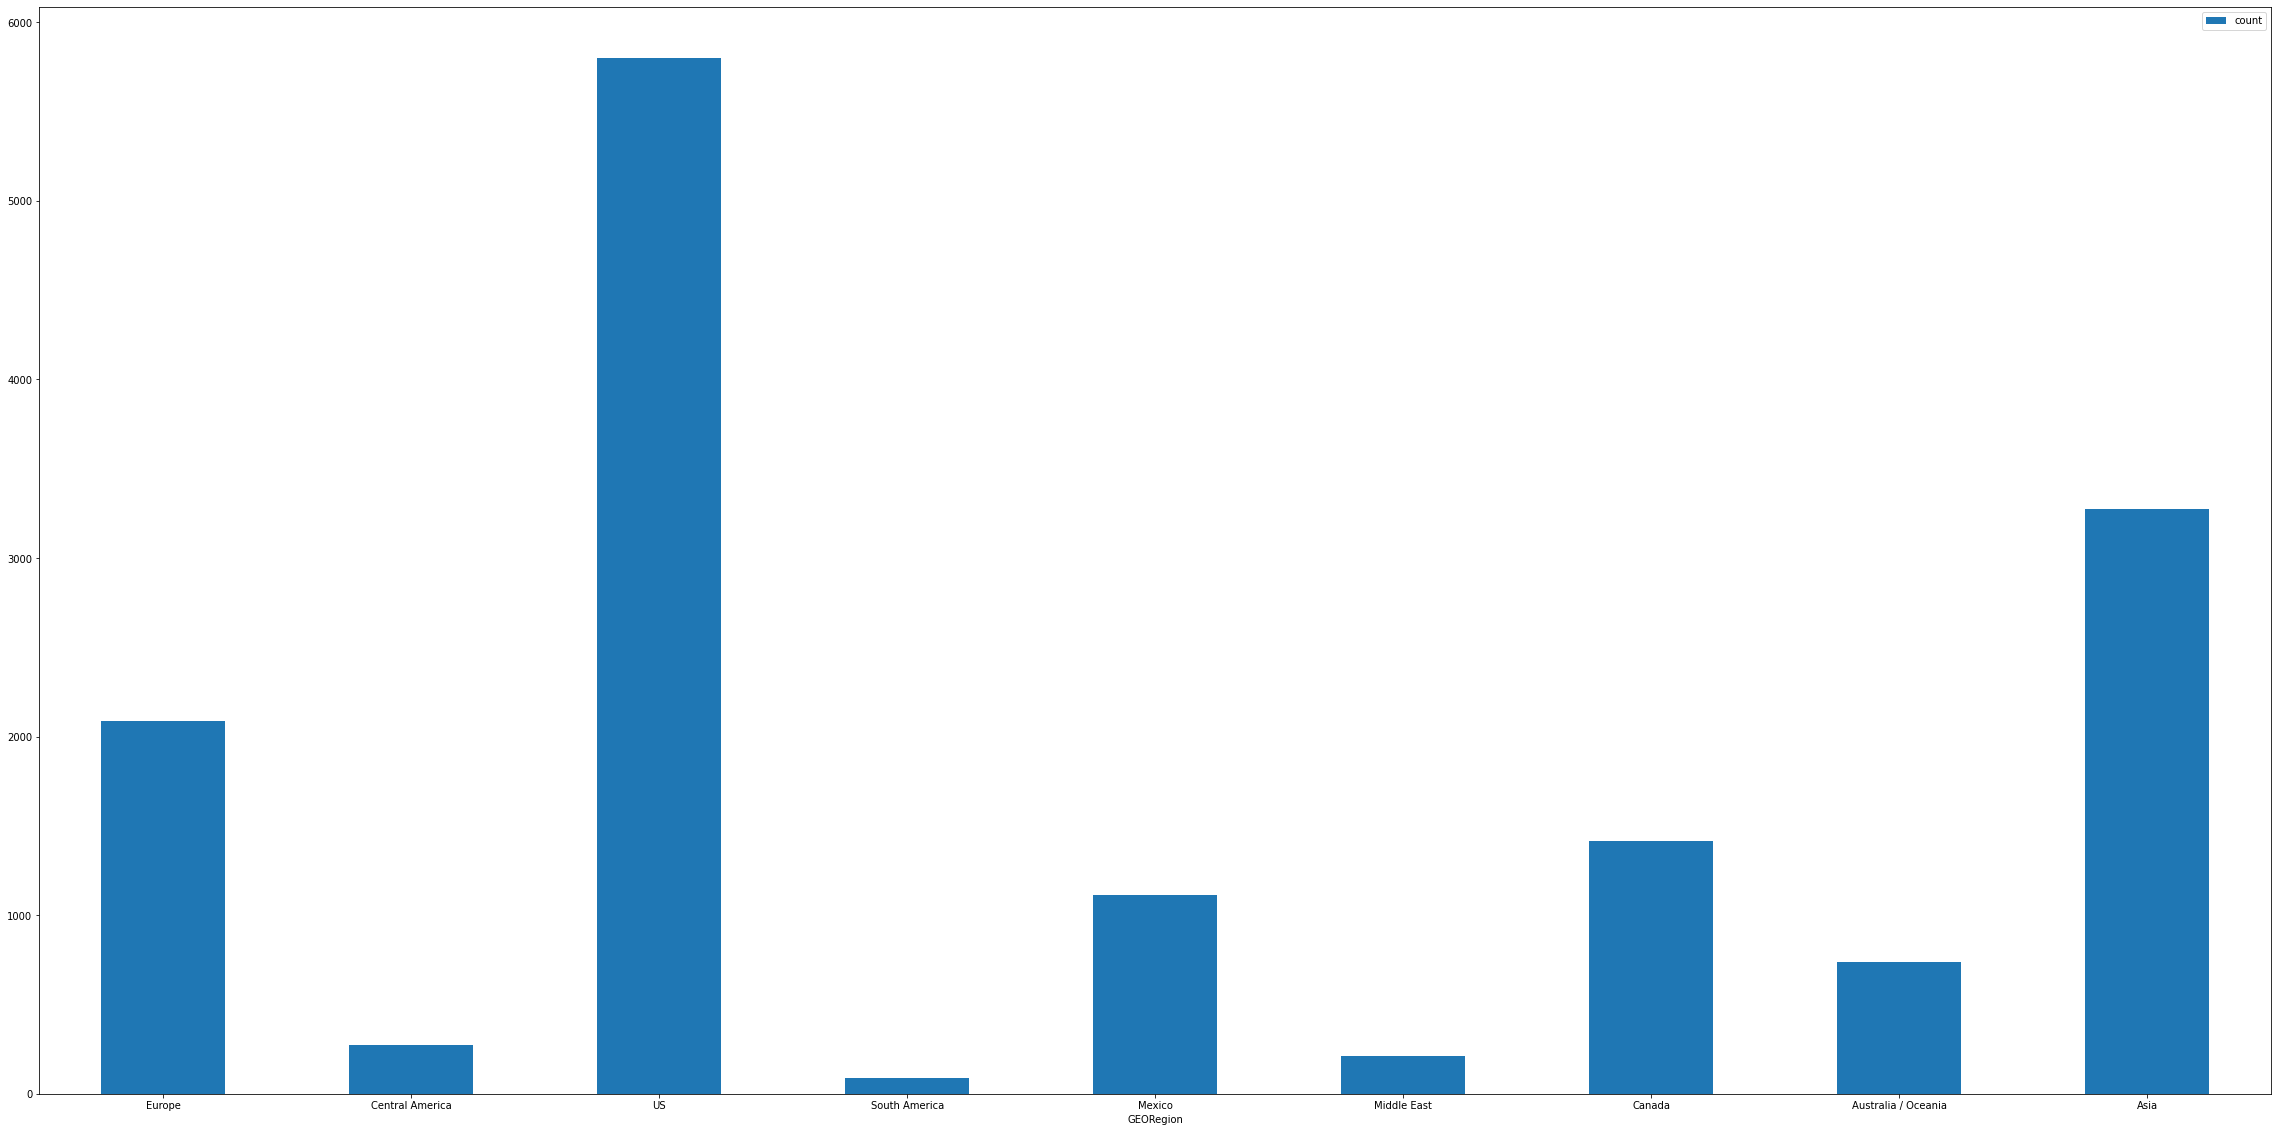

In [ ]:
GEO_Region=df_airport.groupby('GEORegion').count()
GEO_Region.show()

GEO_Region_pd = GEO_Region.toPandas()

ax = GEO_Region_pd.plot.bar(x='GEORegion', y='count', rot=0)

plt.rcParams["figure.figsize"] = (10,5)

plt.show()

##Correlacion

In [ ]:
df_airport_pd = df_airport.toPandas()
corr_matrix = df_airport_pd.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')


,ActivityPeriod,OperatingAirline,OperatingAirlineIATACode,PublishedAirline,PublishedAirlineIATACode,GEOSummary,GEORegion,ActivityTypeCode,PriceCategoryCode,Terminal,BoardingArea,PassengerCount,AdjustedActivityTypeCode,AdjustedPassengerCount,Year,Month,DateOrd
ActivityPeriod,1.000000,0.008180,-0.043338,0.009663,-0.010853,0.066100,-0.028145,-0.052450,-0.005754,-0.088284,-0.005123,0.060311,-0.052450,0.059336,0.999940,-0.027142,0.999940
OperatingAirline,0.008180,1.000000,0.823688,0.968828,0.818090,-0.130956,0.151120,0.100644,-0.096112,0.197959,0.251975,0.185424,0.100644,0.186427,0.008183,-0.000452,0.008180
OperatingAirlineIATACode,-0.043338,0.823688,1.000000,0.790621,0.919021,-0.131919,0.101535,0.099556,-0.091939,0.208314,0.280294,0.122244,0.099556,0.123170,-0.043257,0.000861,-0.043258
PublishedAirline,0.009663,0.968828,0.790621,1.000000,0.859995,-0.083020,0.108379,0.098414,-0.095284,0.199894,0.275990,0.200862,0.098414,0.201890,0.009641,0.000609,0.009638
PublishedAirlineIATACode,-0.010853,0.818090,0.919021,0.859995,1.000000,-0.027591,0.008986,0.097818,-0.105385,0.167910,0.312936,0.155368,0.097818,0.156337,-0.010837,0.001689,-0.010837
GEOSummary,0.066100,-0.130956,-0.131919,-0.083020,-0.027591,1.000000,-0.871826,-0.026760,0.411498,-0.574422,0.109553,-0.395743,-0.026760,-0.396856,0.066046,-0.001139,0.066048
GEORegion,-0.028145,0.151120,0.101535,0.108379,0.008986,-0.871826,1.000000,0.033899,-0.382864,0.509119,-0.121033,0.336113,0.033899,0.336980,-0.028129,0.000949,-0.028130
ActivityTypeCode,-0.052450,0.100644,0.099556,0.098414,0.097818,-0.026760,0.033899,1.000000,0.001004,0.087788,0.087706,-0.071423,1.000000,-0.067804,-0.052364,-0.001523,-0.052368
PriceCategoryCode,-0.005754,-0.096112,-0.091939,-0.095284,-0.105385,0.411498,-0.382864,0.001004,1.000000,-0.102936,0.213485,-0.065047,0.001004,-0.064661,-0.005683,-0.003627,-0.005681
Terminal,-0.088284,0.197959,0.208314,0.199894,0.167910,-0.574422,0.509119,0.087788,-0.102936,1.000000,0.168414,0.429146,0.087788,0.430687,-0.088155,-0.000093,-0.088161


In [ ]:
print(df_airport_pd["GEOSummary"].unique())
print(df_airport_pd["PriceCategoryCode"].unique())
print(df_airport_pd["ActivityTypeCode"].unique())

['Domestic' 'International']
['Low Fare' 'Other']
['Deplaned' 'Enplaned' 'Thru / Transit']
